# Кластеризация К-Средних - K-Means Clustering

## Цель:
Работая с методами обучения без учителя (unsupervised learning), очень важно уделить время на постановку задачи. В данном примере мы постараемся объединить в кластеры клиентов некоторого банка, для маркетинговых целей. Такое объединение в кластеры очень сильно зависит от предметной области.

## Данные
Источник: https://archive.ics.uci.edu/ml/datasets/bank+marketing

    # Данные о клиентах банка:
    1 - age - возраст(numeric)
    2 - job : категория работы (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
    3 - marital : семейный статус (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
    4 - education - образование (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
    5 - default: были ли просрочки по кредиту? (categorical: 'no','yes','unknown')
    6 - housing: есть ли кредит на жильё? (categorical: 'no','yes','unknown')
    7 - loan: есть ли потребительский кредит? (categorical: 'no','yes','unknown')
    # информация о последней коммуникации банка с клиентом в текущей маркетинговой кампании:
    8 - contact: тип коммуникации (categorical: 'cellular','telephone')
    9 - month: месяц года, когда была последняя коммуникация (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
    10 - day_of_week: день недели, когда была последняя коммуникация (categorical: 'mon','tue','wed','thu','fri')
    11 - duration: длительность последней коммуникации, в секундах (numeric). Важное замечание: этот атрибут очень сильно влияет на целевую переменную (например, если duration=0, то y='no'). Однако, эта длительность неизвестна до момента совершения телефонного звонка. А после звонка значение y уже становится явно известным. Поэтому данный атрибут следует рассматривать только для анализа данных, и его следует исключить из рассмотрения, когда мы создаём предиктивную модель.
    # другие атрибуты:
    12 - campaign: сколько раз банк контактировал с клиентом во время текущей маркетинговой кампании, включая последнюю коммуникацию (numeric)
    13 - pdays: количество дней, прошедшее с момента последней коммуникации с клиентом во время предыдущей маркетинговой кампании (numeric; 999 означает, что предыдущих коммуникаций не было)
    14 - previous: сколько раз банк контактировал с клиентом по время предыдущих маркетинговых кампаний (numeric)
    15 - poutcome: результат предыдущих маркетинговых кампаний (categorical: 'failure','nonexistent','success')
    # социальные и экономические атрибуты
    16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
    17 - cons.price.idx: consumer price index - monthly indicator (numeric)
    18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
    19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
    20 - nr.employed: number of employees - quarterly indicator (numeric)
    21 - y - has the client subscribed a term deposit? (binary: 'yes','no')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('../DATA/bank-full.csv')

In [6]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [10]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


Для возраста - `age` - минимальное значение равно 17 - это минимальный возраст, начиая с которого люди в этом банке могут стать клиентами и получать маркетинговые предложения. Самому пожилому клиенту банка - 98 лет.

In [12]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'subscribed'],
      dtype='object')

## Анализ непрерывных признаков

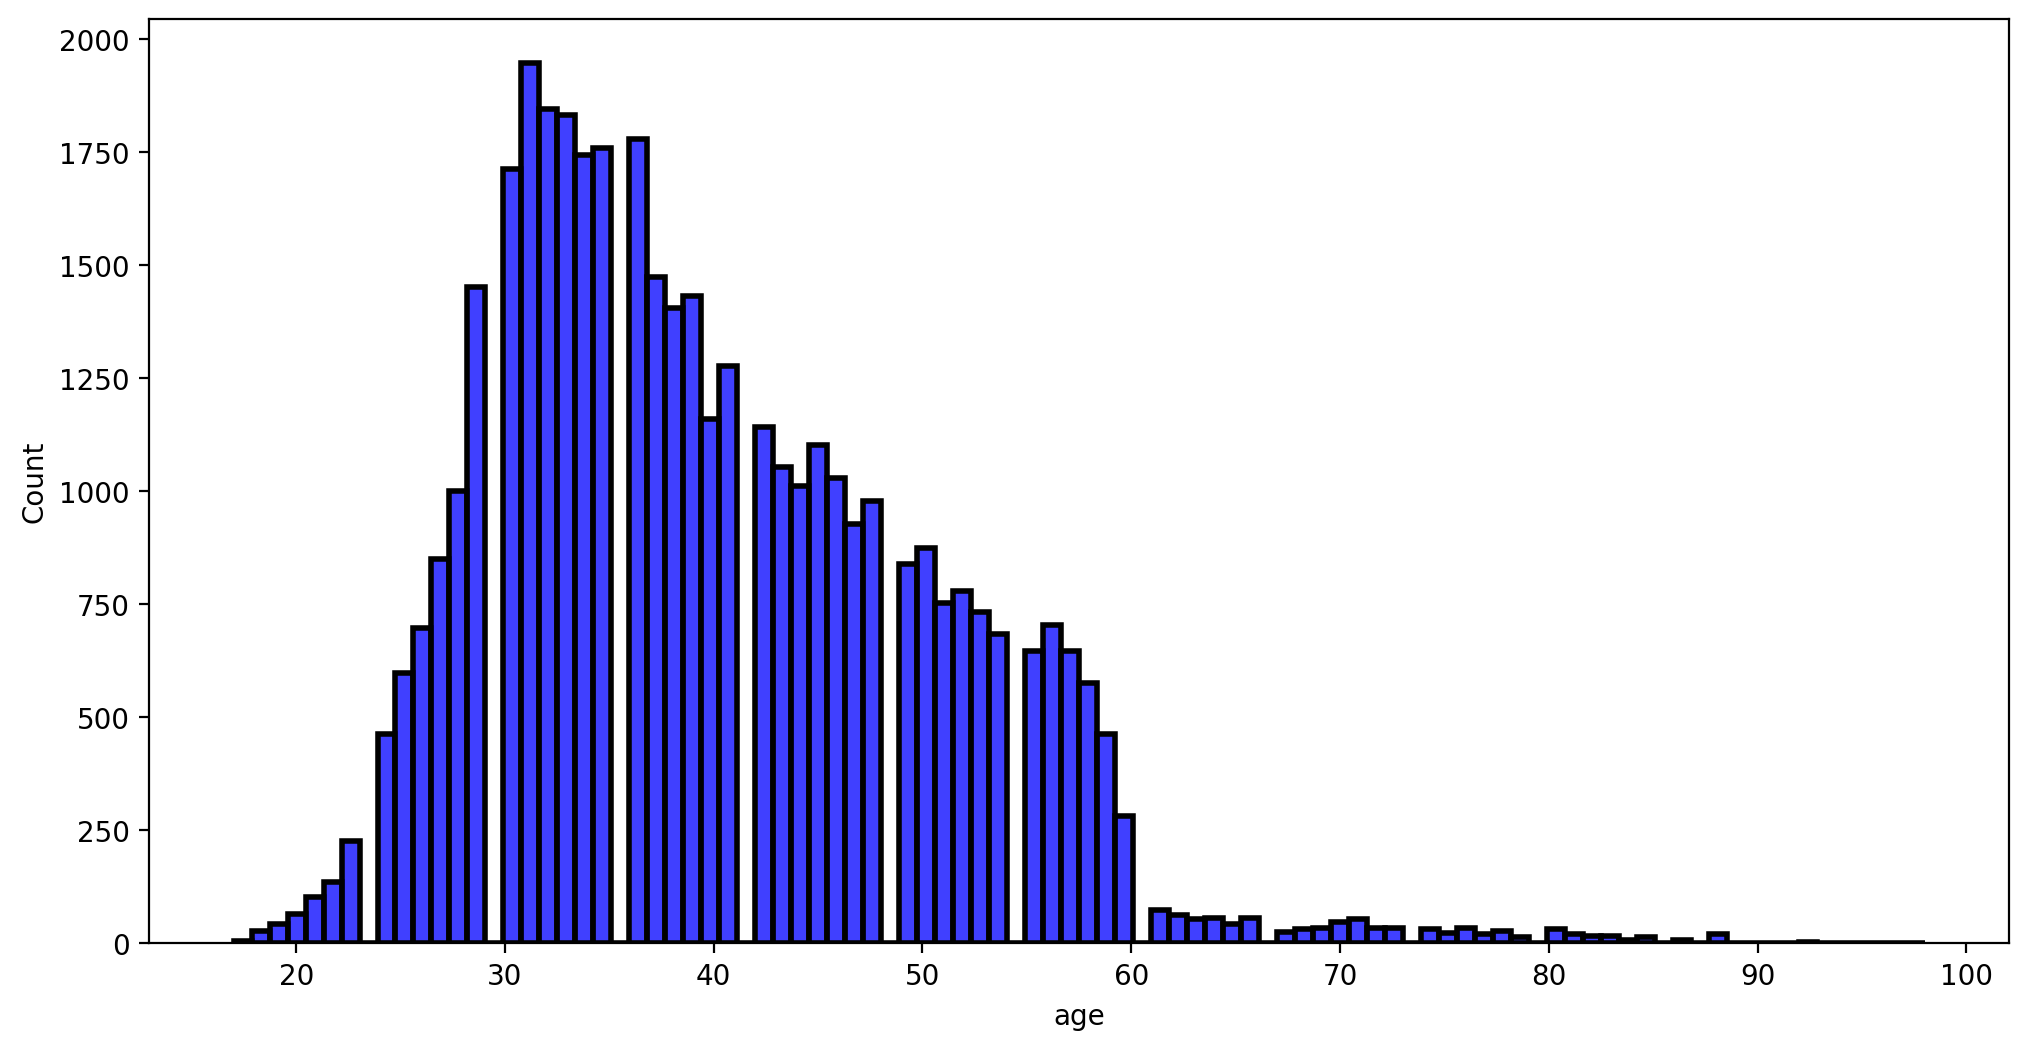

In [14]:
plt.figure(figsize=(12, 6), dpi=200)
sns.histplot(data=df, x='age', color='blue', edgecolor='black', linewidth=2)
plt.show()

Получаем график расперделения возрастов. Здесь также видно пробелы в некоторых диапазонах.

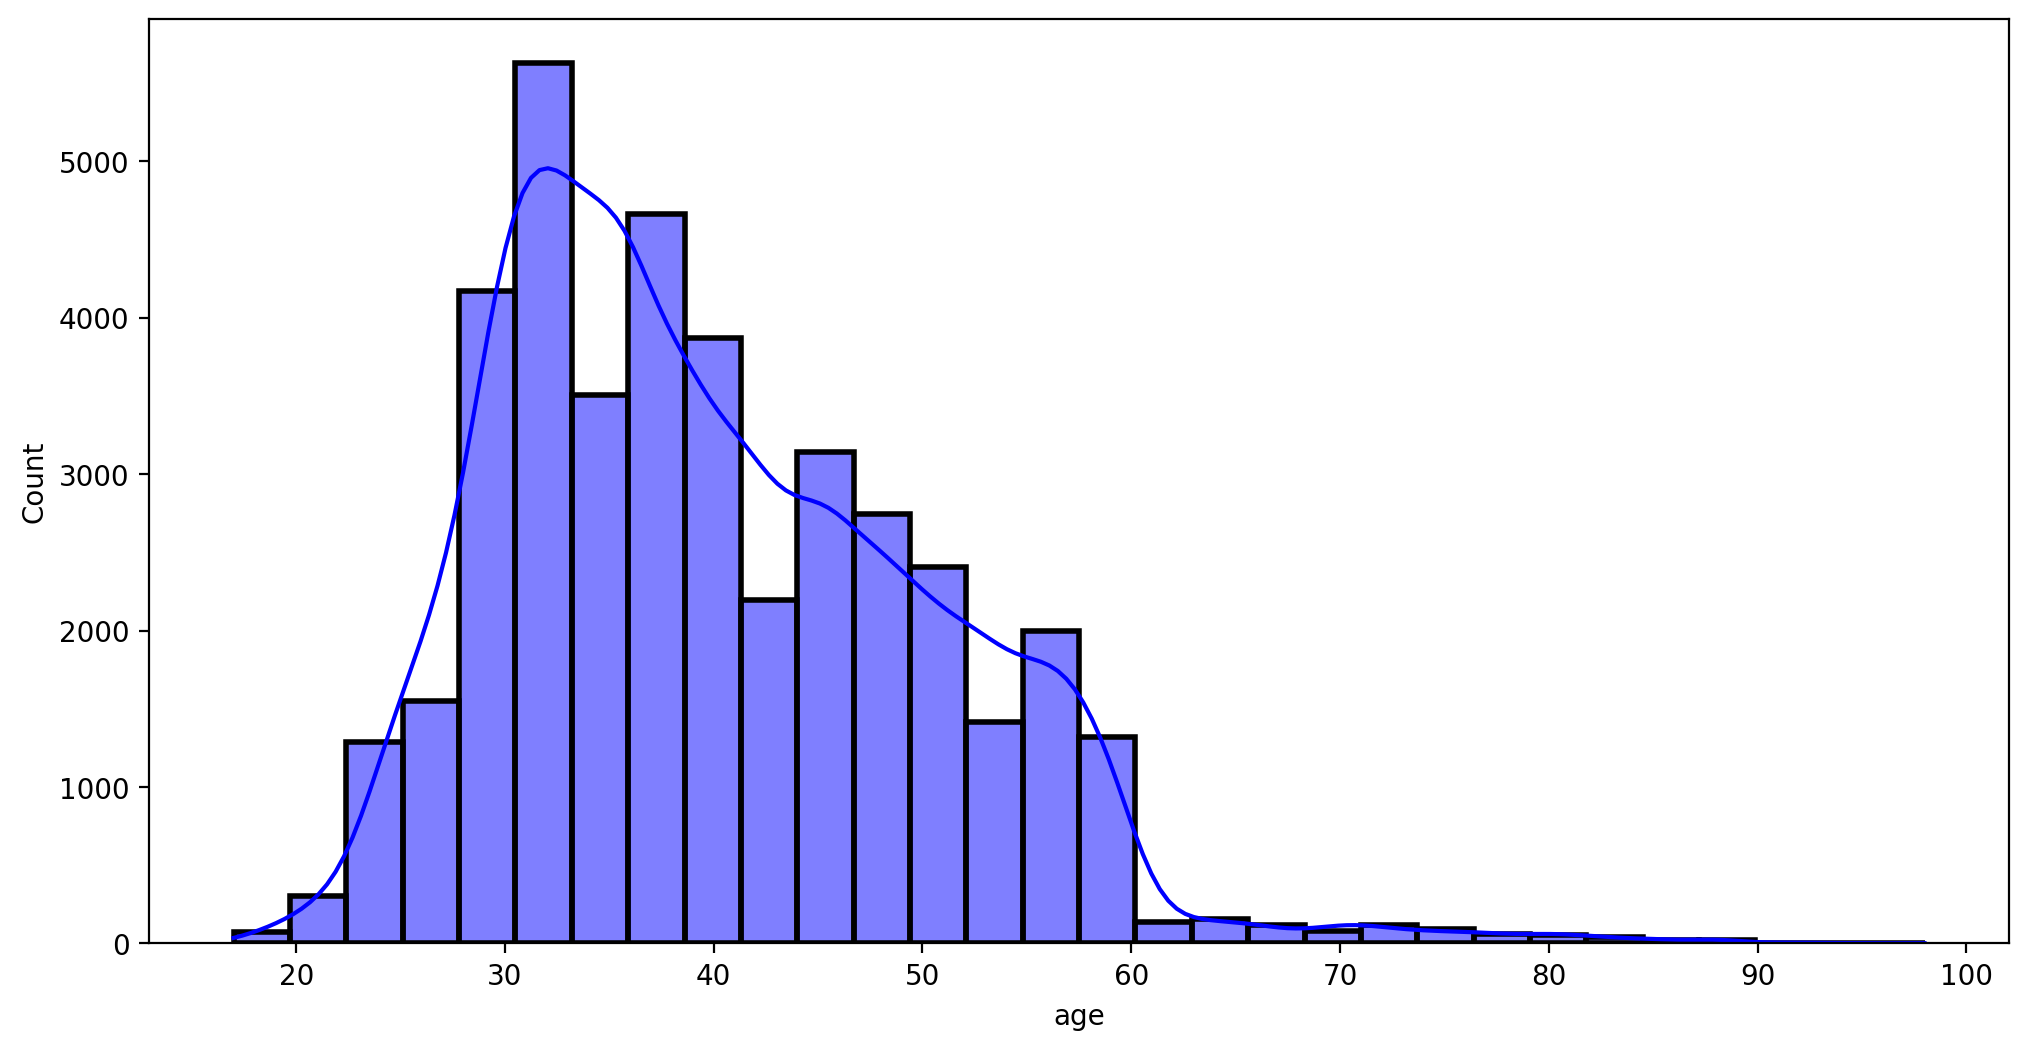

In [16]:
plt.figure(figsize=(12, 6), dpi=200)
sns.histplot(data=df, x='age', bins=30, kde=True, color='blue', edgecolor='black', linewidth=2)
plt.show()

Мы видим, что большая часть маркетинговых коммуникаций отправлялась людям в возрасте от 30 до 40 лет. Потому что в это возрасте людям, например, могут пригодиться кредиты на покупку недвижимости.

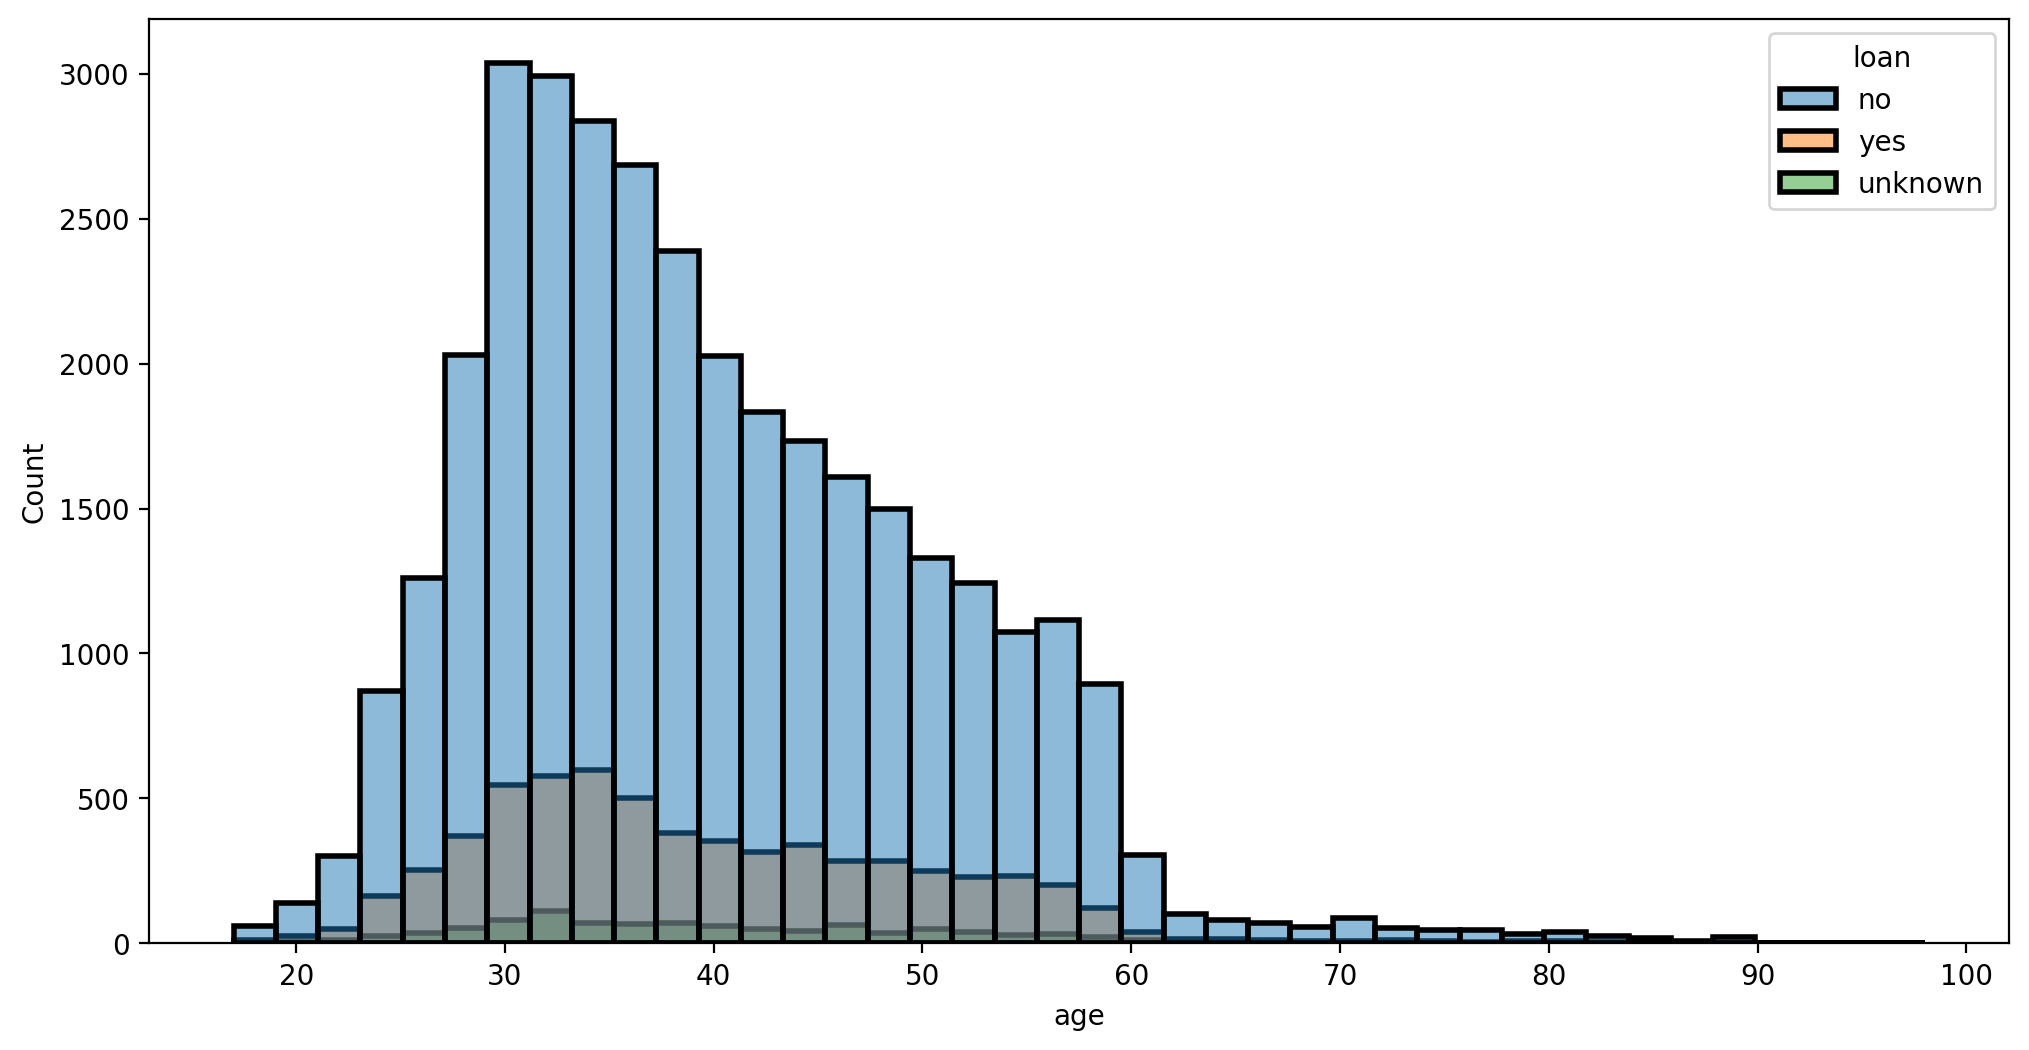

In [18]:
plt.figure(figsize=(12, 6), dpi=200)
sns.histplot(data=df, x='age', bins=40, hue='loan', color='blue', edgecolor='black', linewidth=2)
plt.show()

Здесь видно три группы клиентов: у кого есть кредит, у кого нет кредита и про кого нет информации. У большинства клиентов - кредита нет и, с точки зрения нашей задачи, это очень полезная колонка. Если необходимо отправить маркетинговое сообщение с предложением взять кредит, то лучше не отправлять такое предложение тем клиентам, у кого он уже есть, поэтому можно взять тех клиентов, у которых его нет и попытаться кластеризовать только этих клиентов.

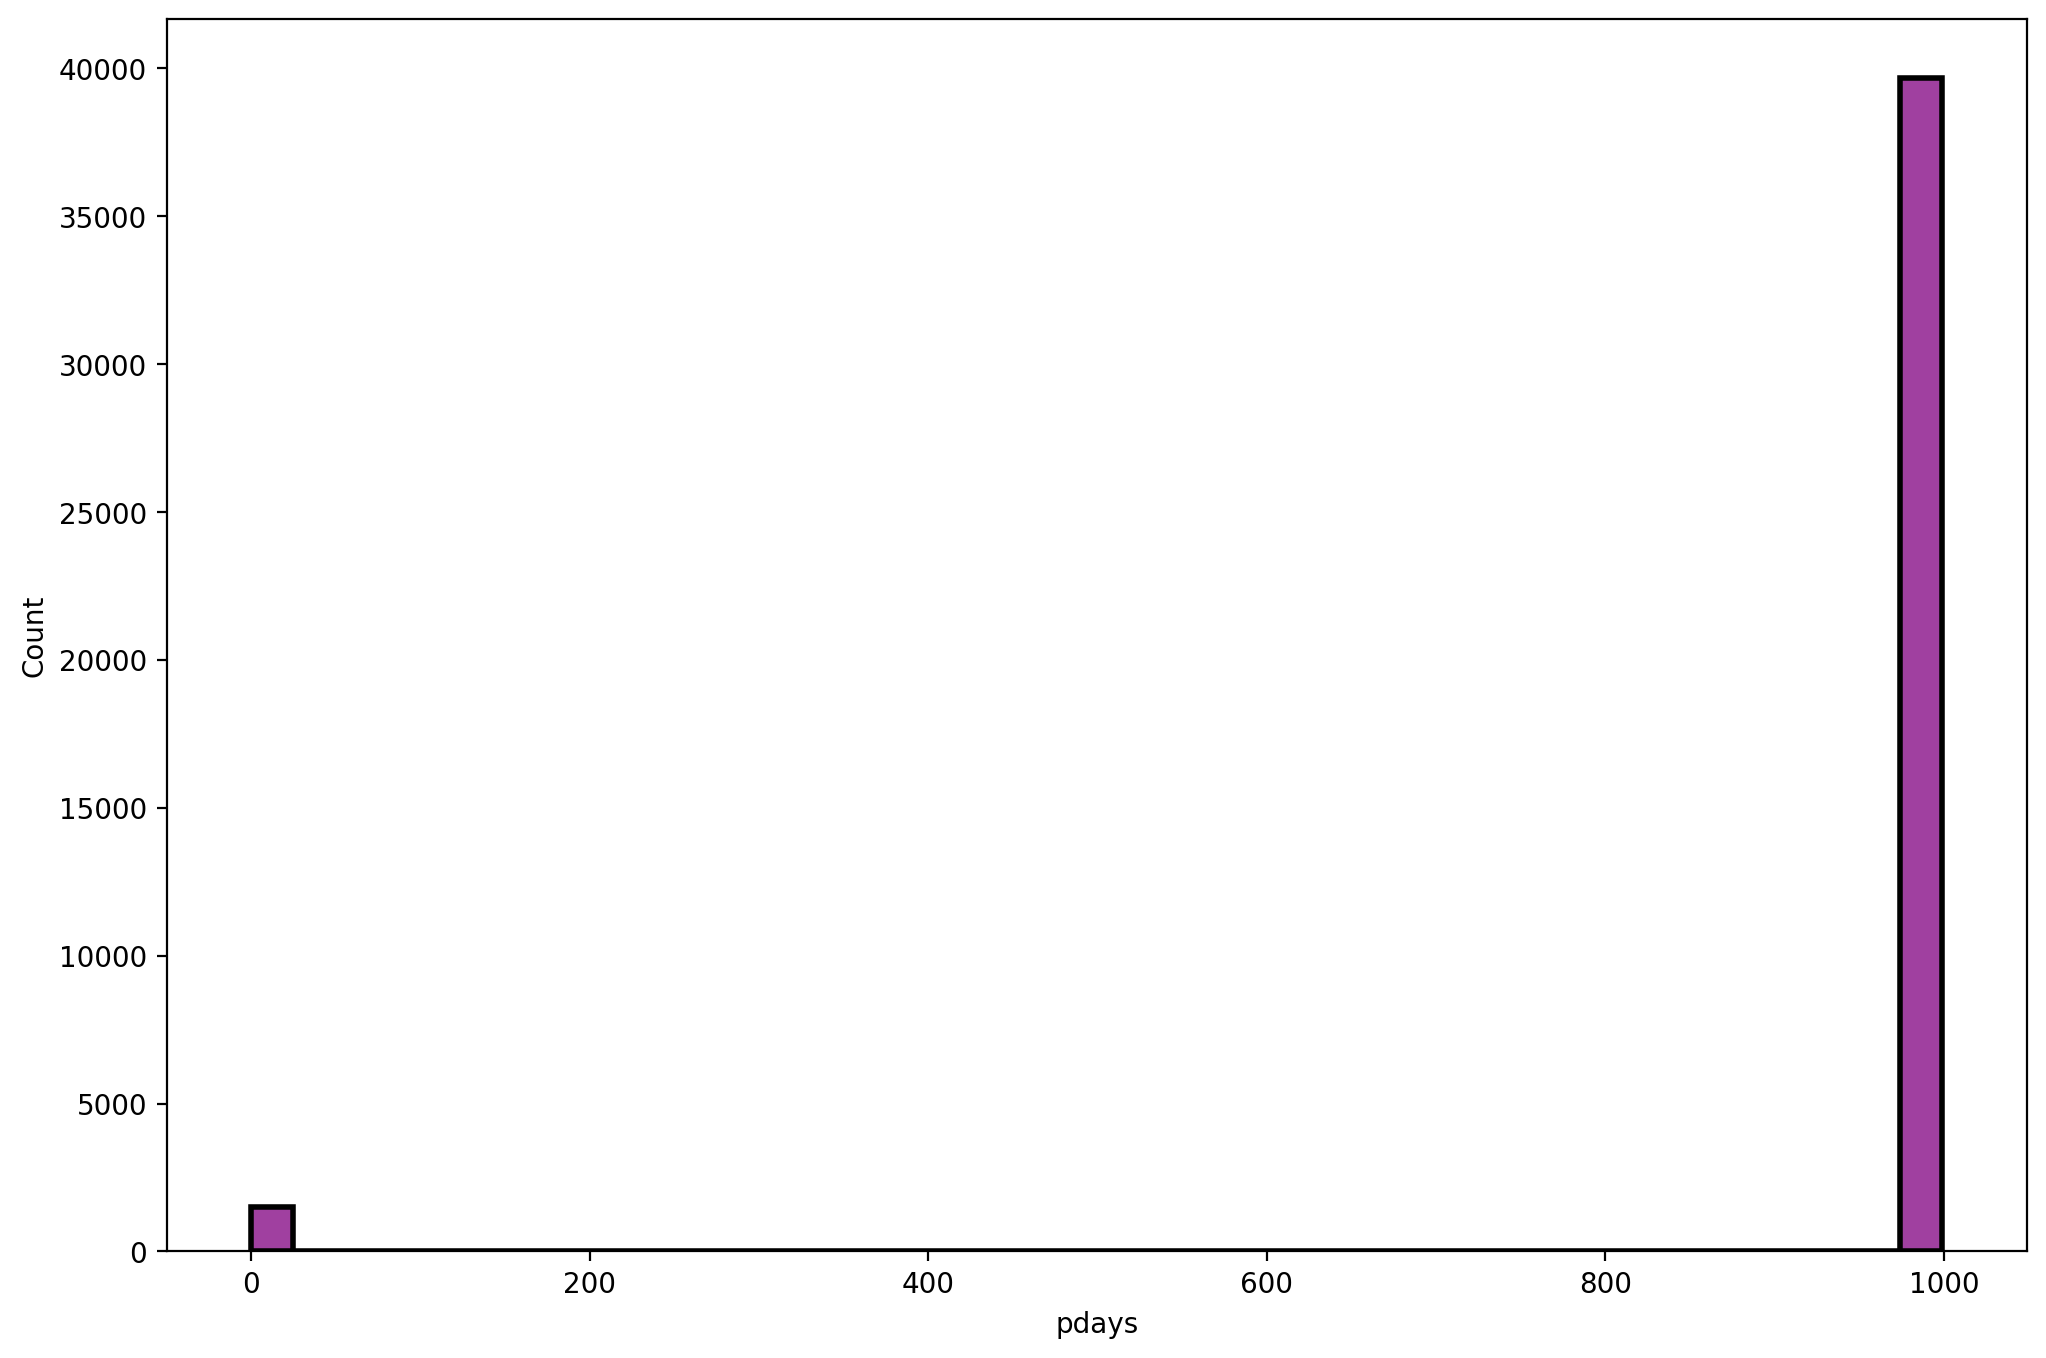

In [20]:
plt.figure(figsize=(12, 8), dpi=200)
sns.histplot(data=df, x='pdays', bins=40, color='purple', edgecolor='black', linewidth=2)
plt.show()

Признак `pdays` - количество дней с момента последней коммуникации с клиентом. Значение равное 999 означает, что с клиентом никогда раньше не контактировали.

По графику видно, что подавляющее число клиентов относится к тем, с кем никогда раньше не контактировали. 

Чтобы построить график для всех отальных клиентов можно либо уменьшить масштаб горизонтальной оси с помощью `xlim`, либо удалить на данном графике тех клиентов, для которых значение переменной равно 999.

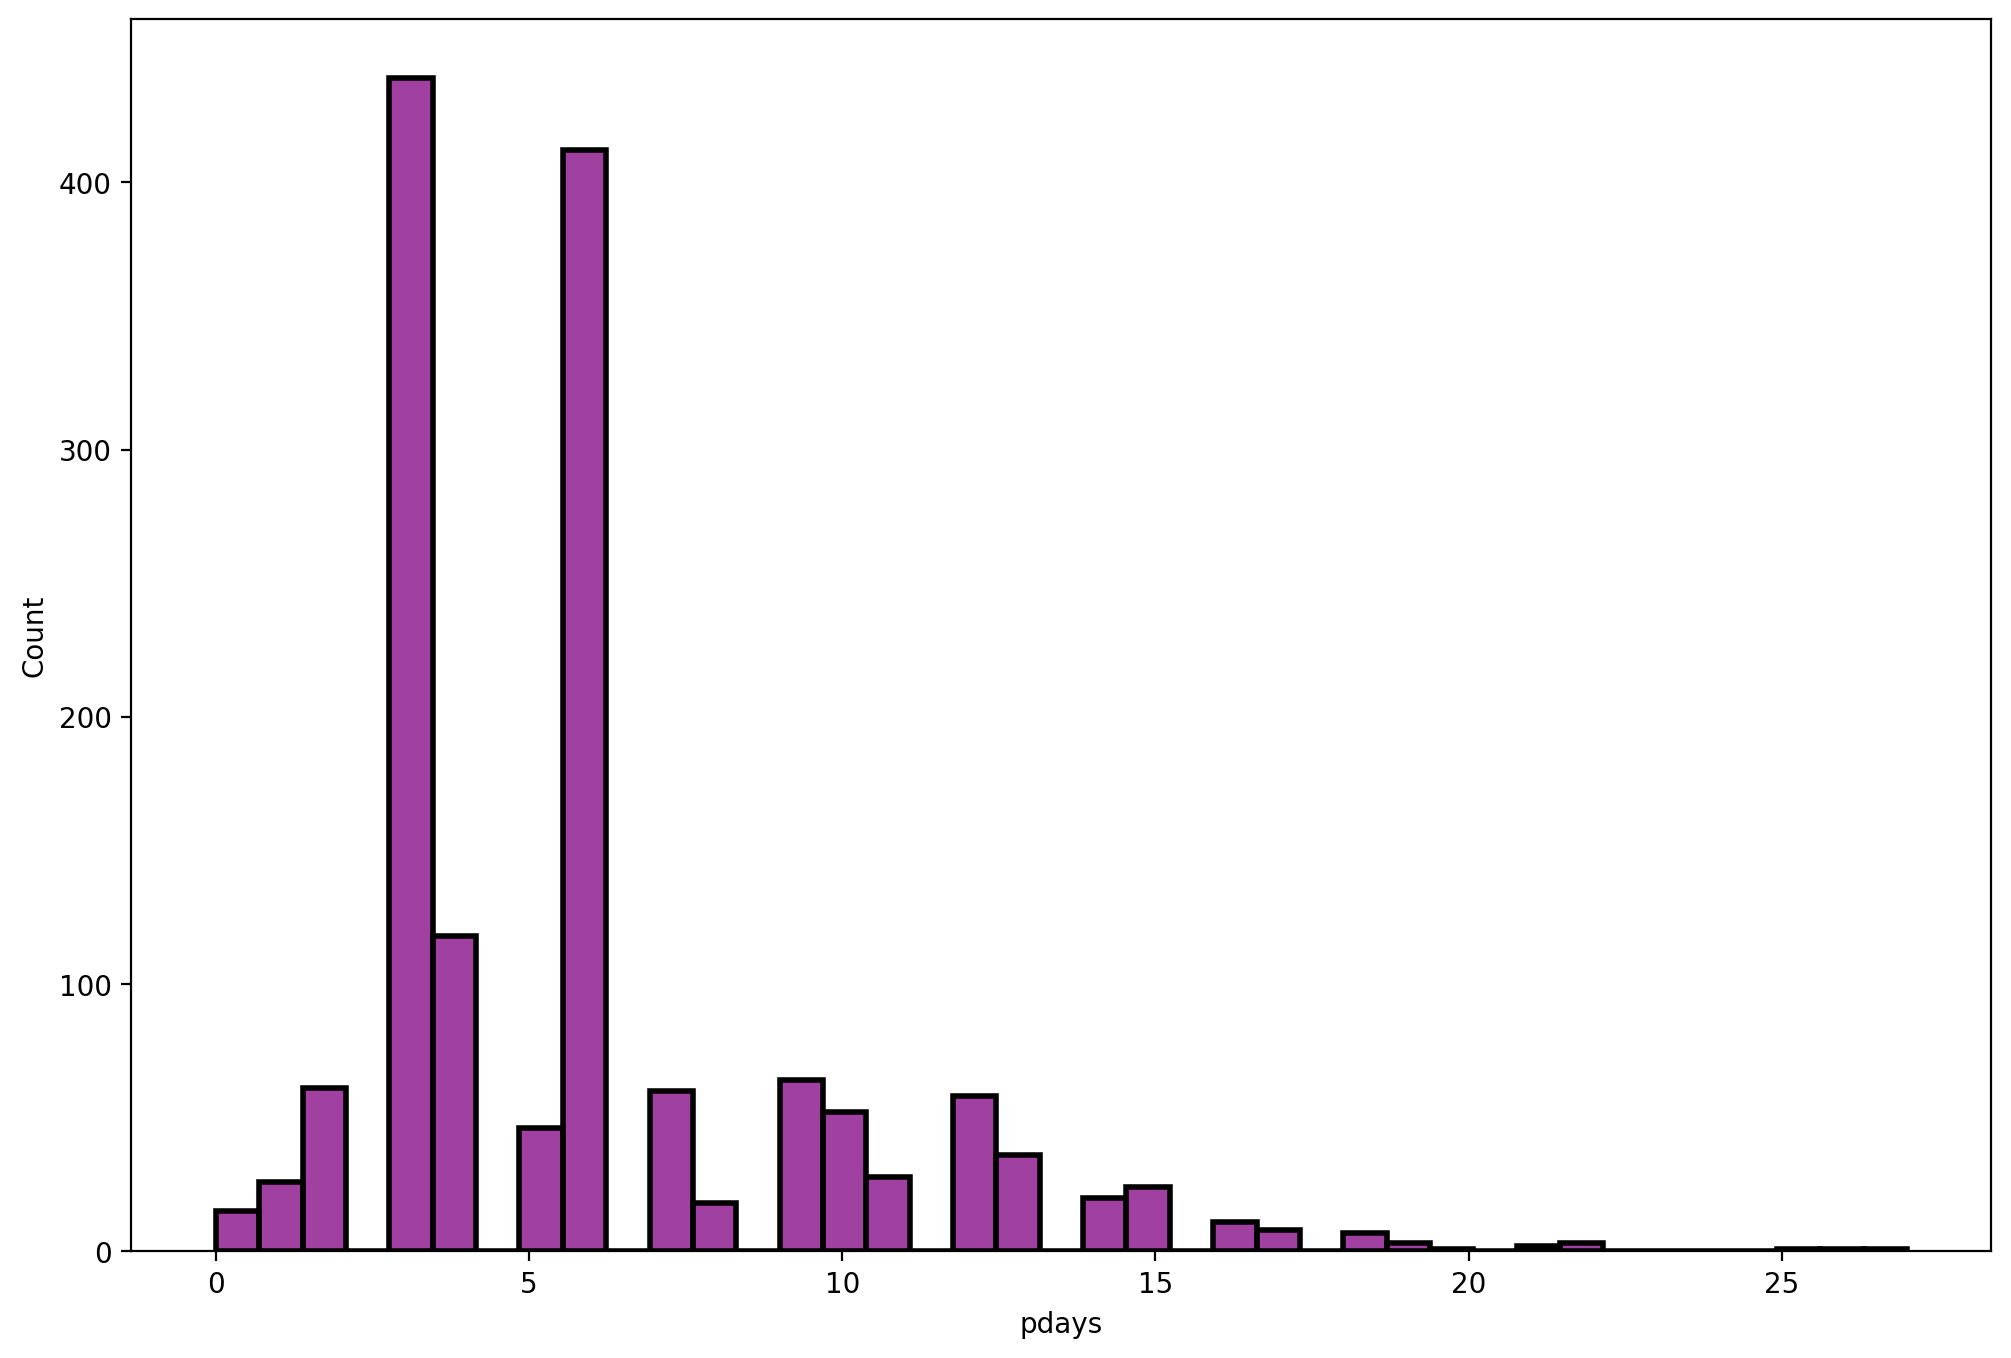

In [22]:
plt.figure(figsize=(12, 8), dpi=200)
sns.histplot(data=df[df['pdays']!=999], x='pdays', color='purple', edgecolor='black', linewidth=2)
plt.show()

Мы получаем распределение для всех клиентов, с которыми хотя бы один раз контактировали по поводу маркетинговых предложений. Банк связывался со многими такими клиентами относительно недавно, несколько дней назад. Но все эти люди на графике - это лишь небольшая часть из общего количества клиентов.

In [24]:
df['contact'].unique()

array(['telephone', 'cellular'], dtype=object)

Банк звонил клиенту либо по сотовому, либо по обычному телефону.

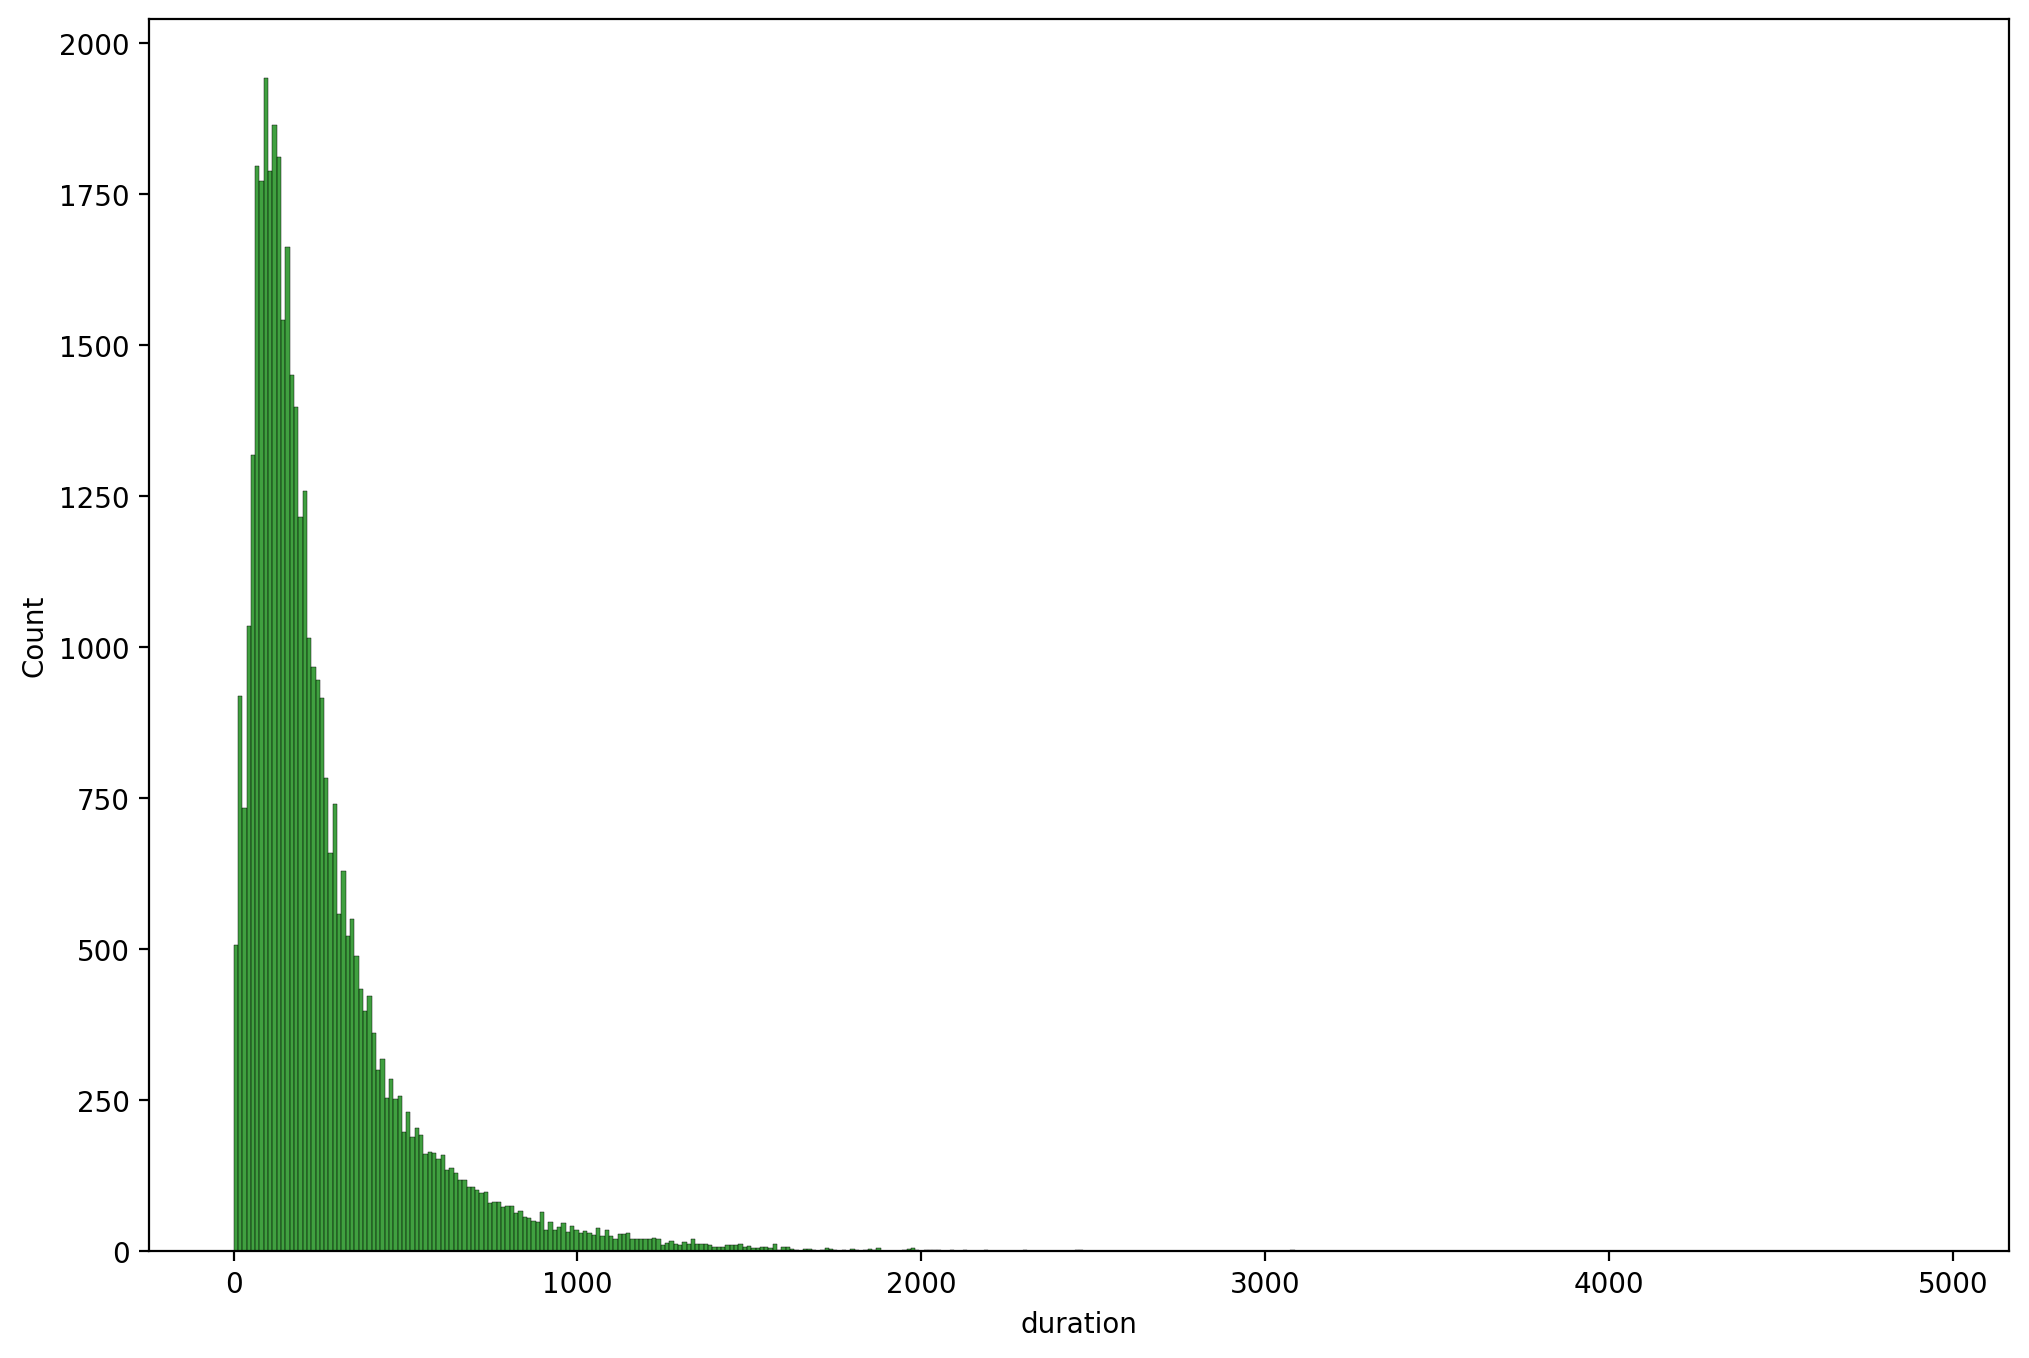

In [26]:
plt.figure(figsize=(12, 8), dpi=200)
sns.histplot(data=df, x='duration', color='green')
plt.show()

Признак `duration` отражает следующую информацию: когда банк последний раз общался с клиентом, то как долго продолжалось общение(количество секунд).

На графике видно несколько случаев когда общение было аномально длительным, но большинство звонков находится в диапазоне от 0 до 1000 секунд, т.е. примерно 10 минут или меньше.

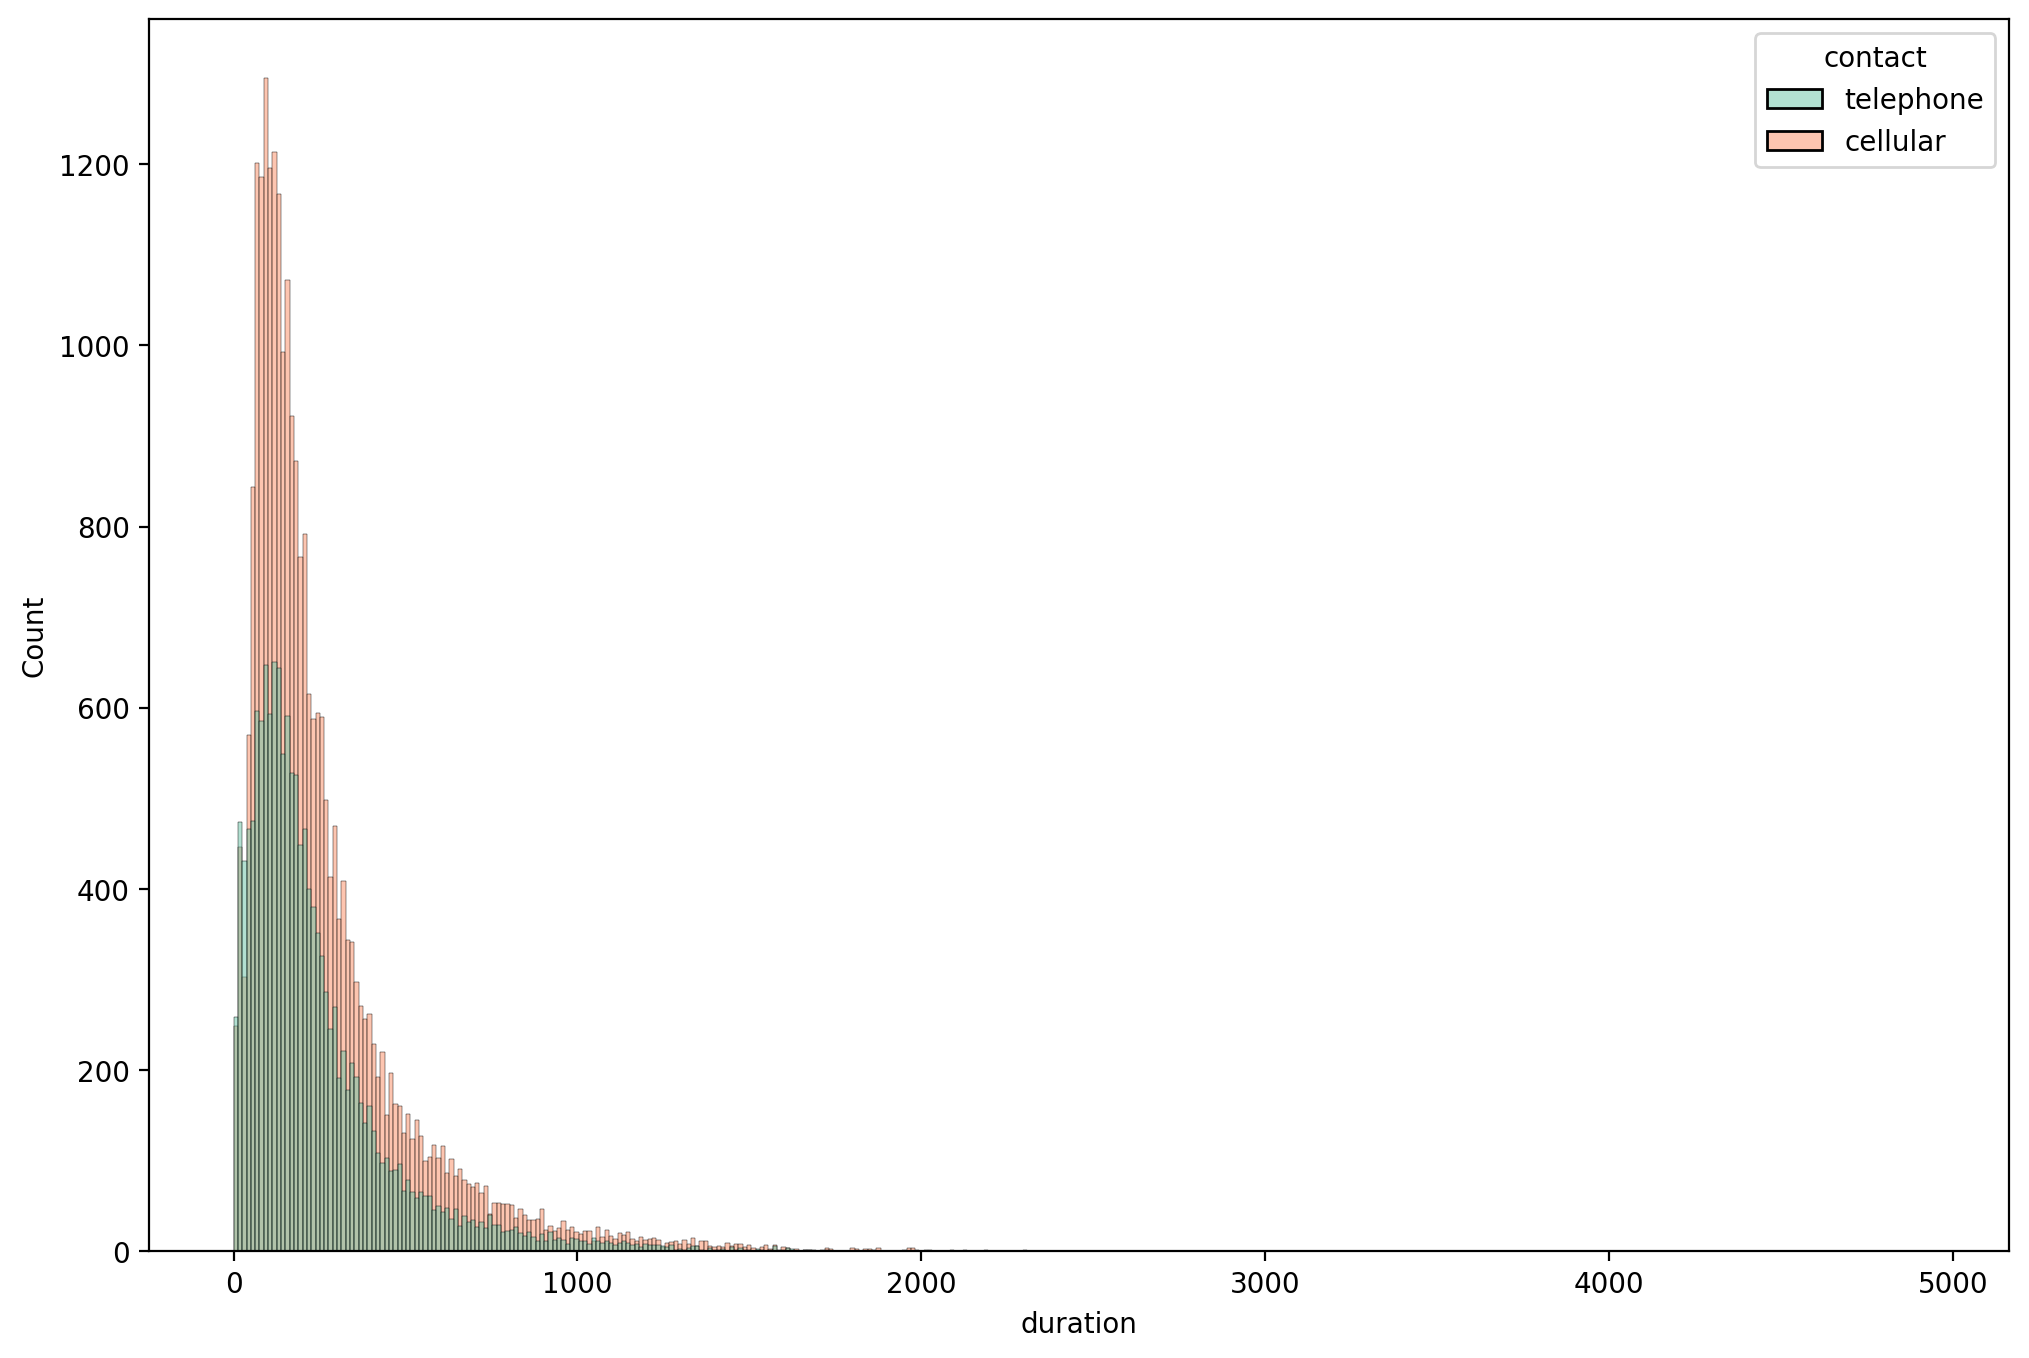

In [28]:
plt.figure(figsize=(12, 8), dpi=200)
sns.histplot(data=df, x='duration', hue='contact', palette='Set2')
plt.show()

Значения для мобильных звонков выше, однако профиль обоих графиков примерно одинаковый.

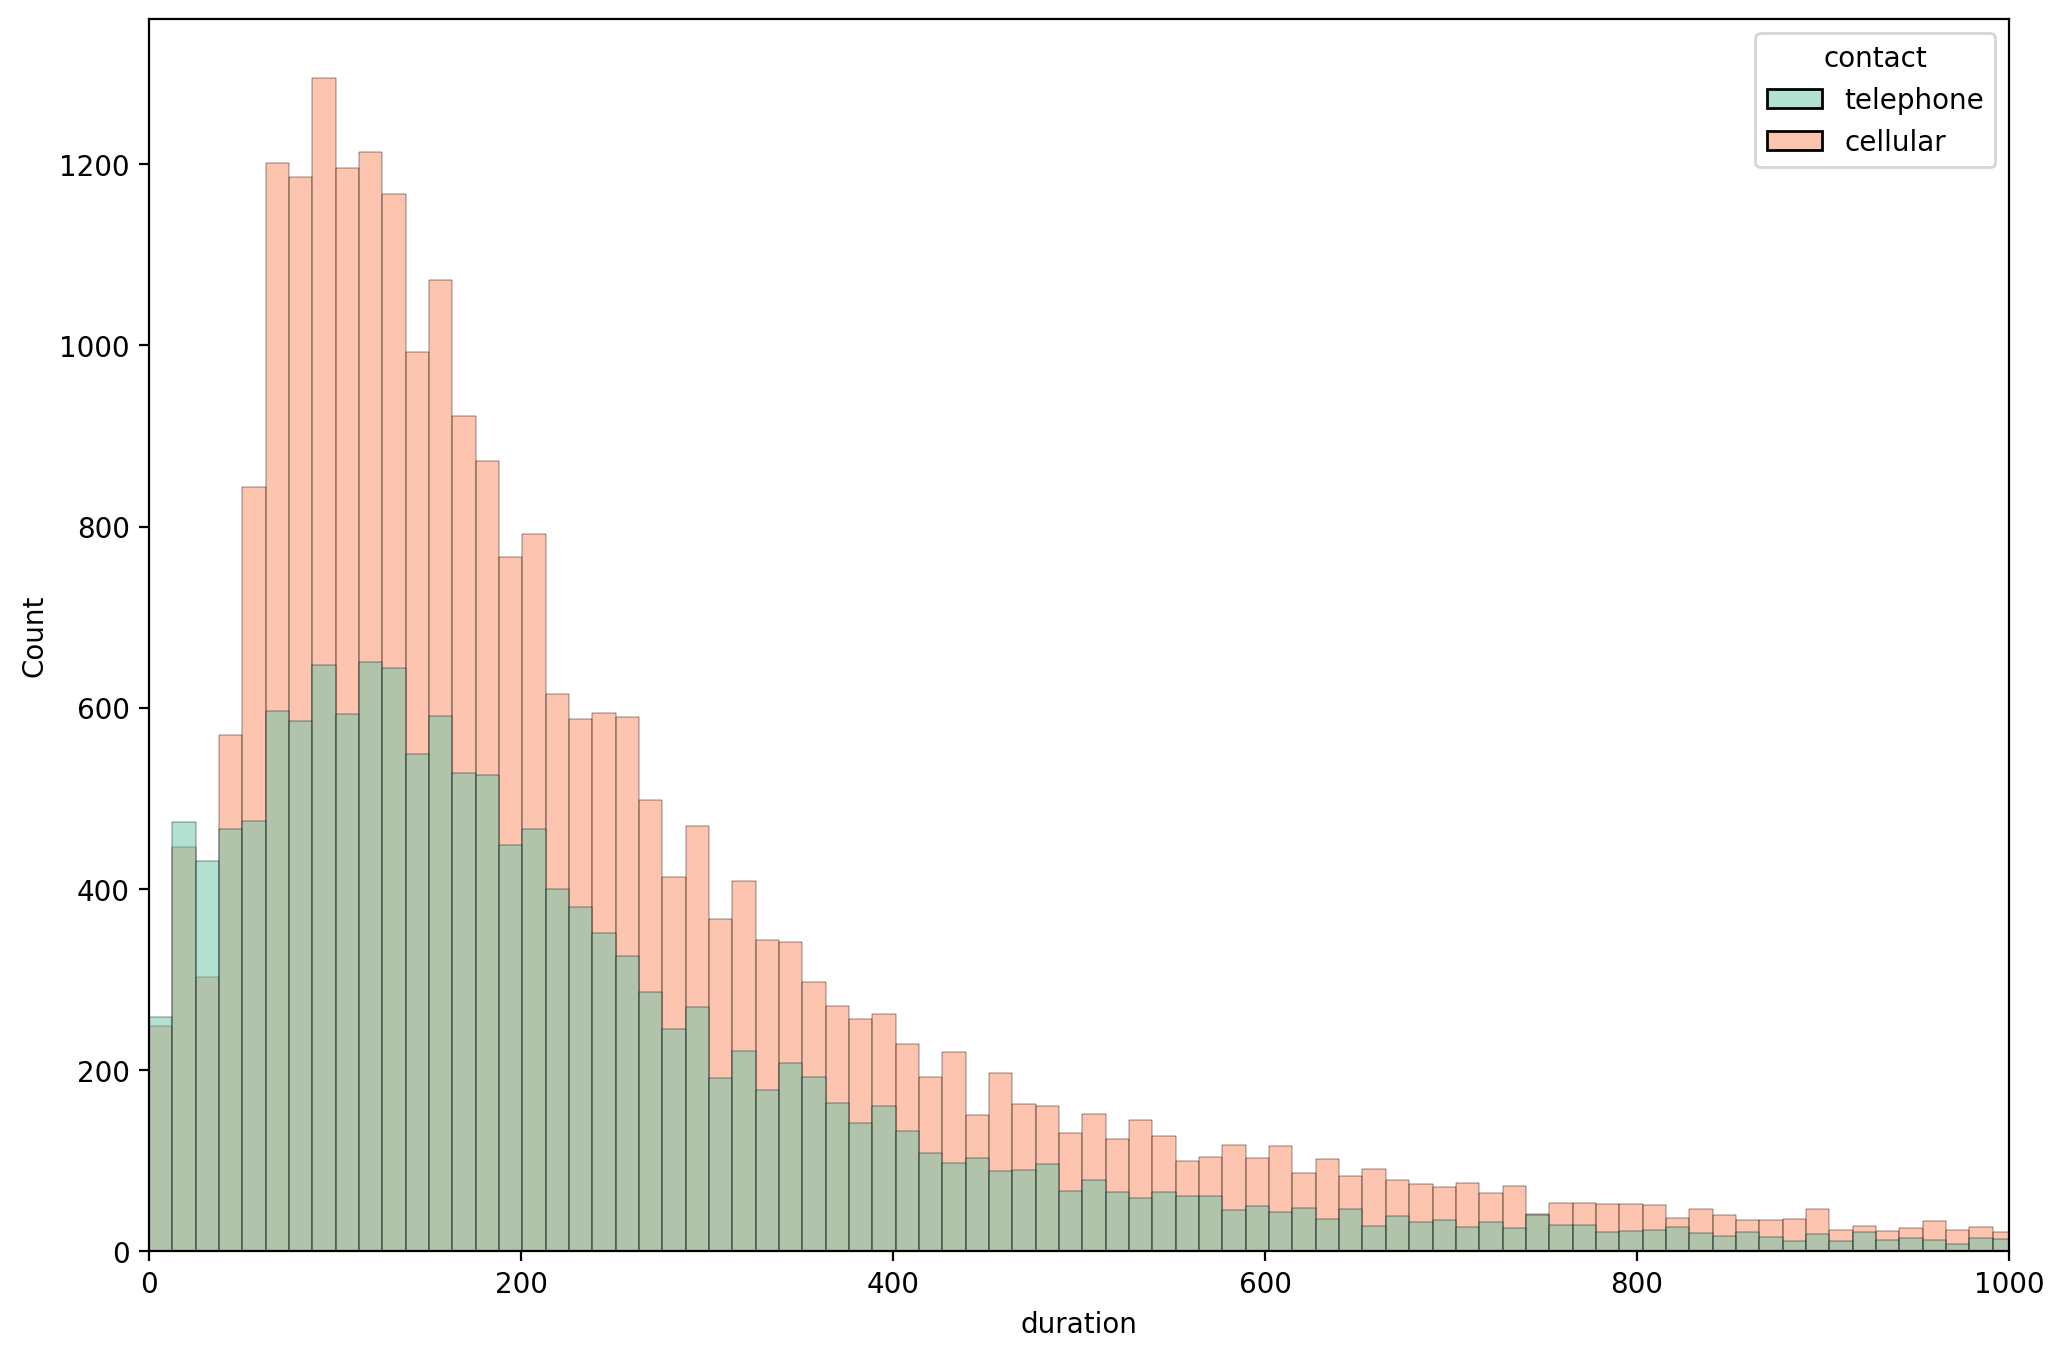

In [30]:
plt.figure(figsize=(12, 8), dpi=200)
sns.histplot(data=df, x='duration', hue='contact', palette='Set2')
plt.xlim(0, 1000)
plt.show()

Большая часть людей указывает в качестве контактного номера телефона - мобильный.

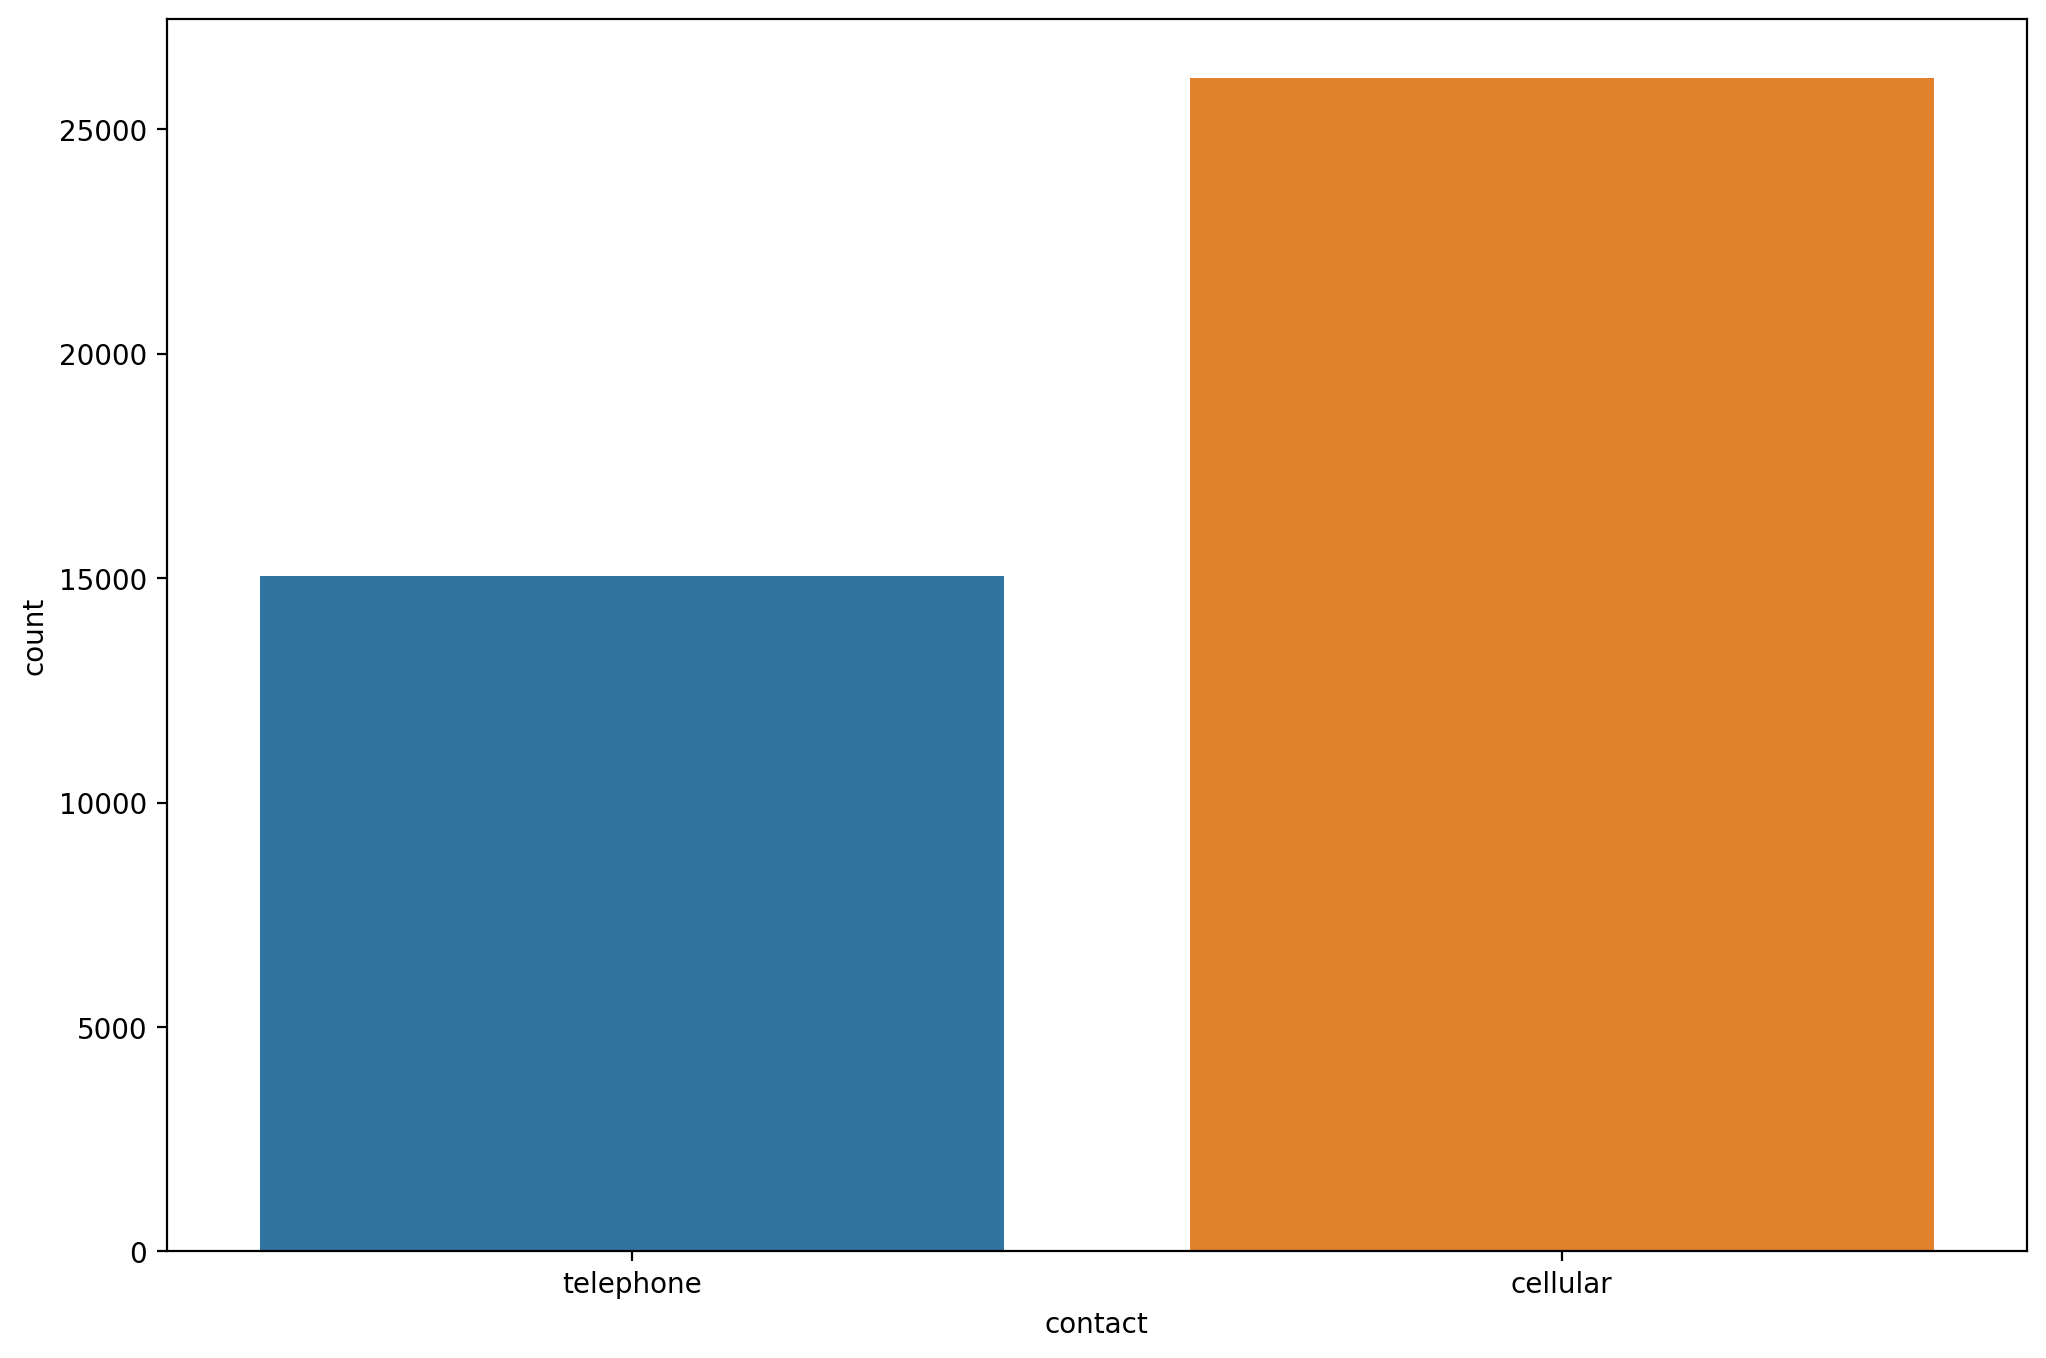

In [32]:
plt.figure(figsize=(12, 8), dpi=200)
sns.countplot(data=df, x='contact', hue='contact')
plt.show()

Мобильных телефонов больше, чем обычных. Однако, как было видно на прошлом графике - это никак не влияет на длительность разговора по телефону.

## Анализ категориальных признаков

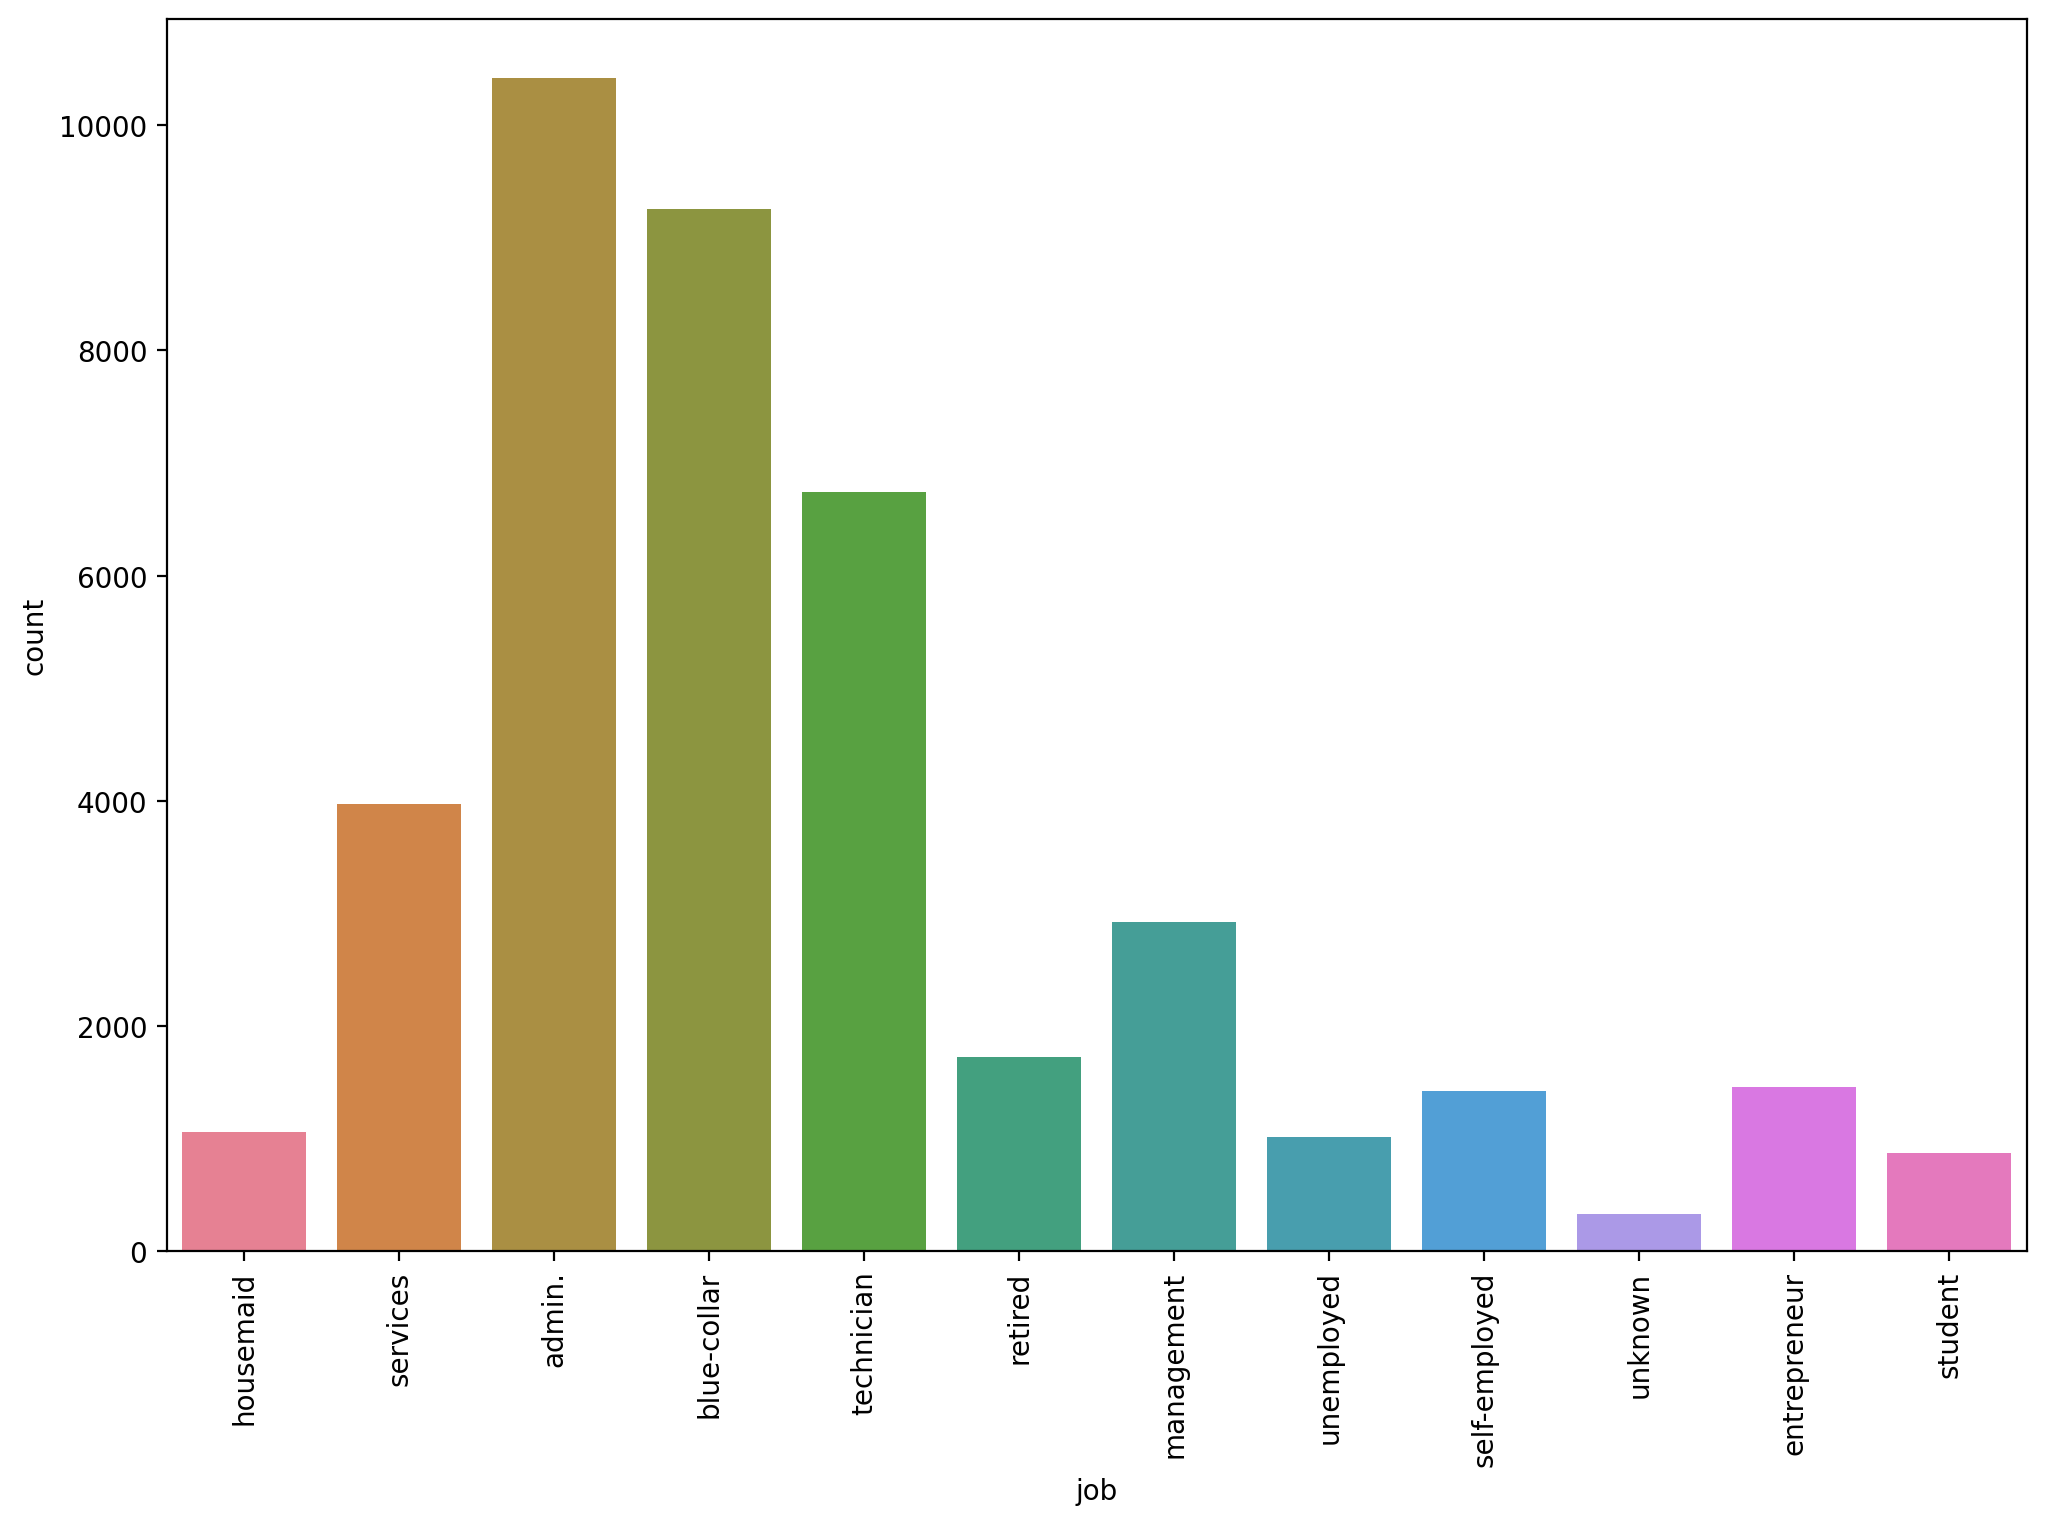

In [34]:
plt.figure(figsize=(12, 8), dpi=200)
sns.countplot(data=df, x='job', hue='job')
plt.xticks(rotation=90)
plt.show()

Отсортируем эти данные: https://stackoverflow.com/questions/46623583/seaborn-countplot-order-categories-by-count

Отсортированный список профессий

In [36]:
df['job'].value_counts()

job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64

Получаем профессии в порядке убывания количества строк

In [39]:
df['job'].value_counts().index

Index(['admin.', 'blue-collar', 'technician', 'services', 'management',
       'retired', 'entrepreneur', 'self-employed', 'housemaid', 'unemployed',
       'student', 'unknown'],
      dtype='object', name='job')

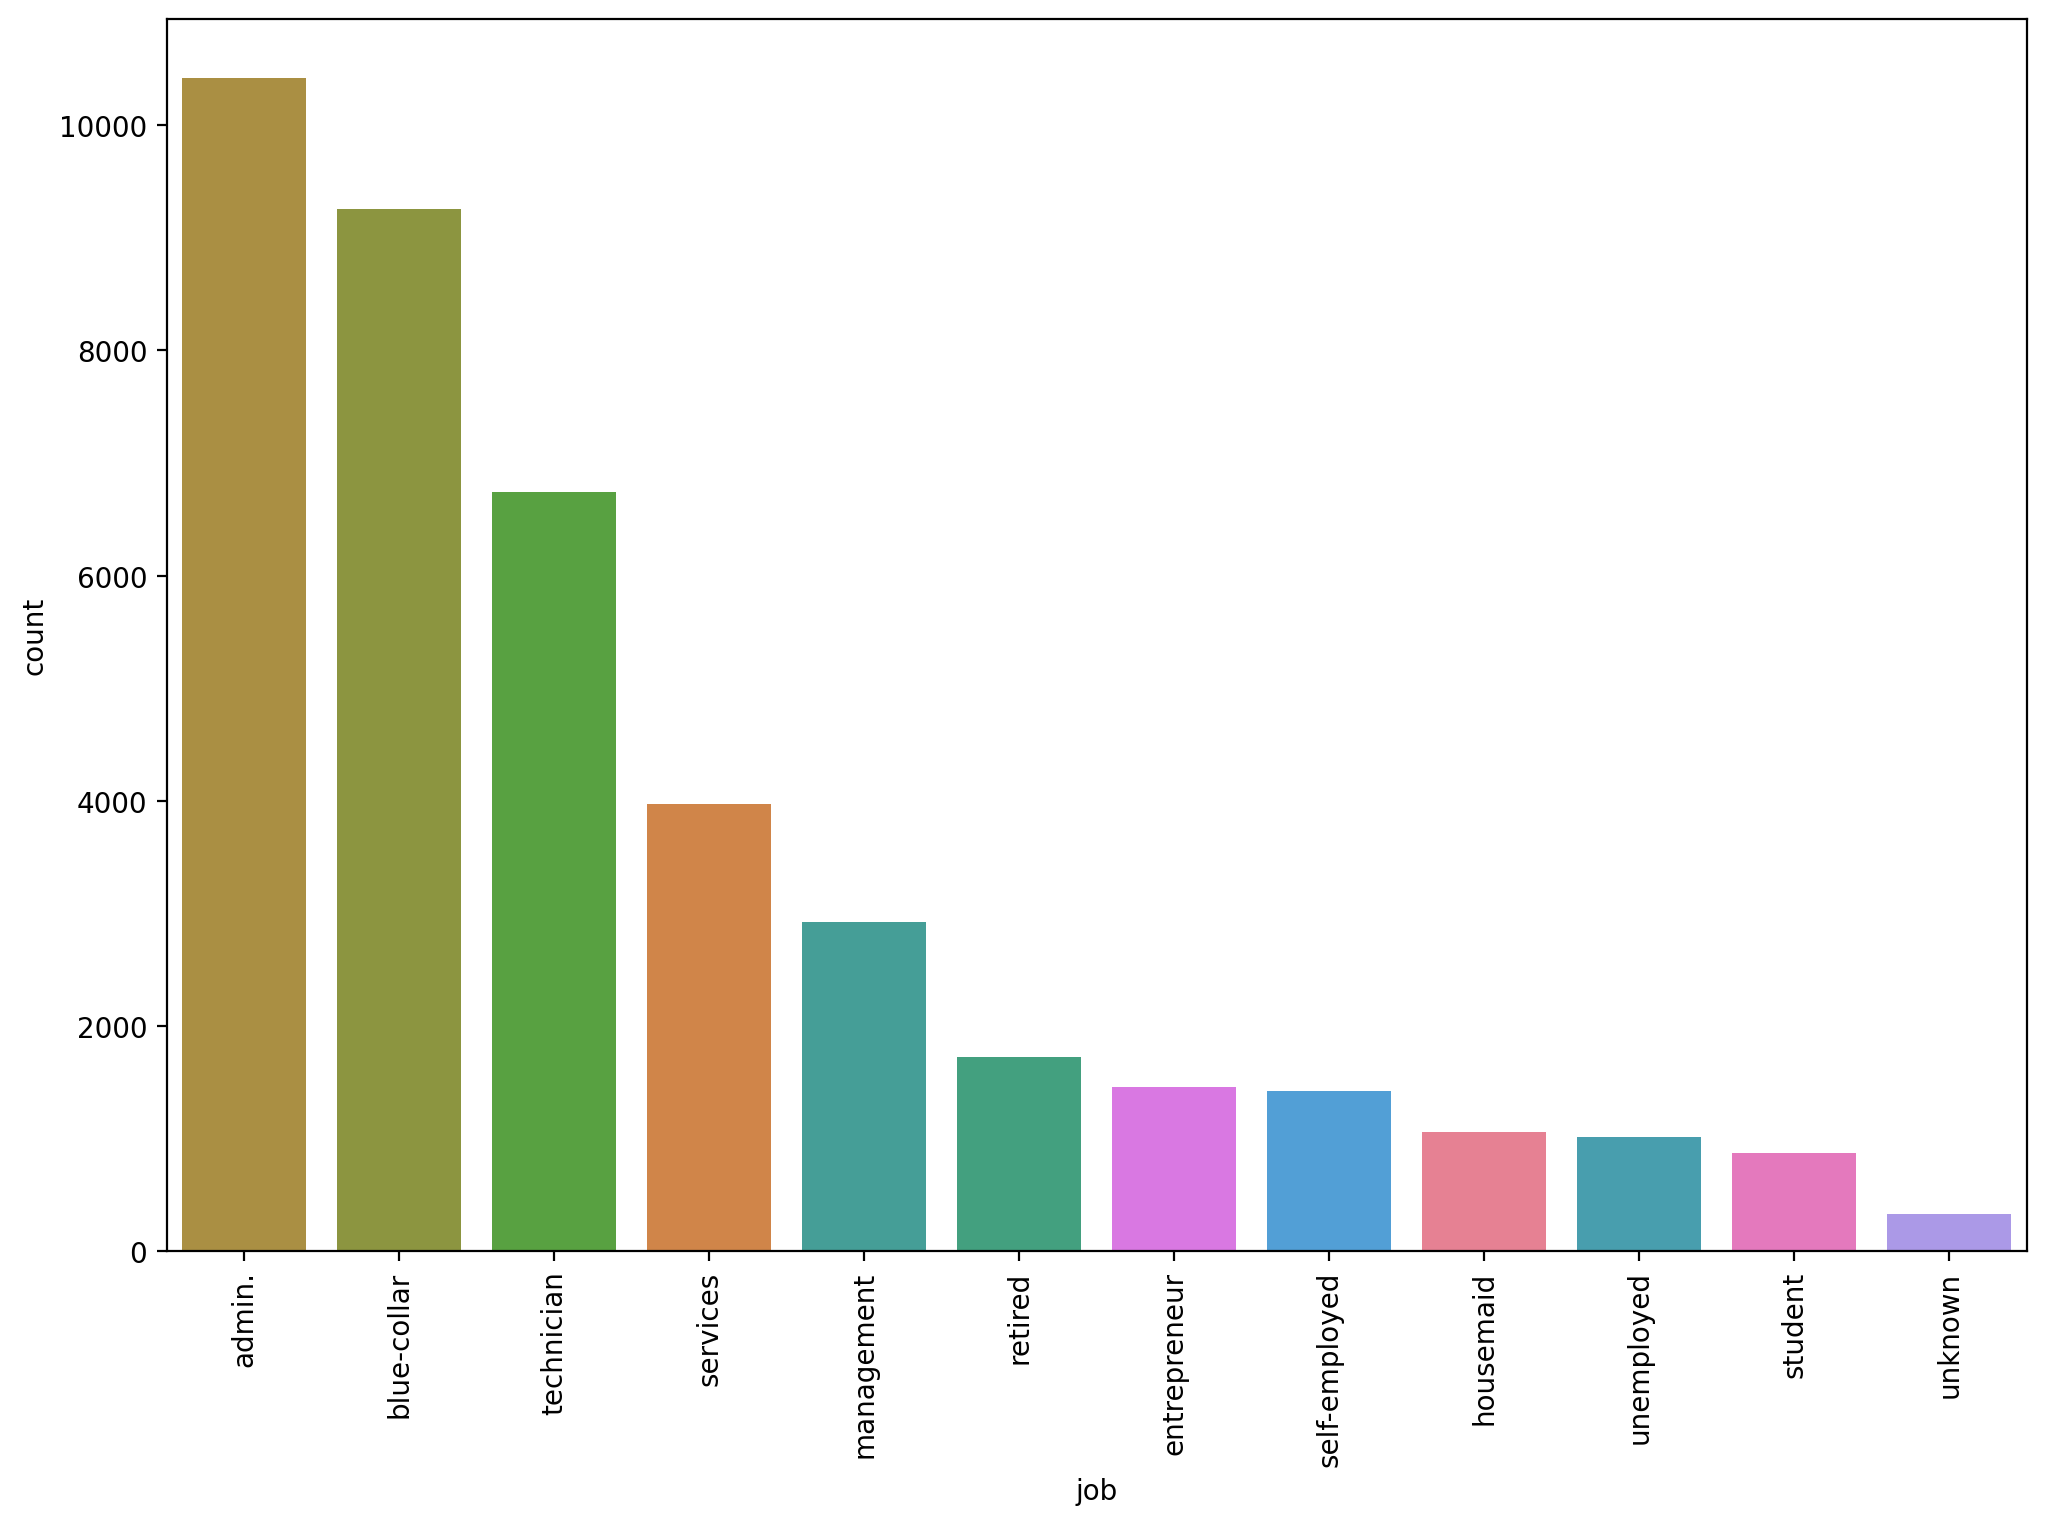

In [41]:
plt.figure(figsize=(12, 8), dpi=200)
sns.countplot(data=df, x='job', hue='job', order=df['job'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

Можно построить такой же график для образования

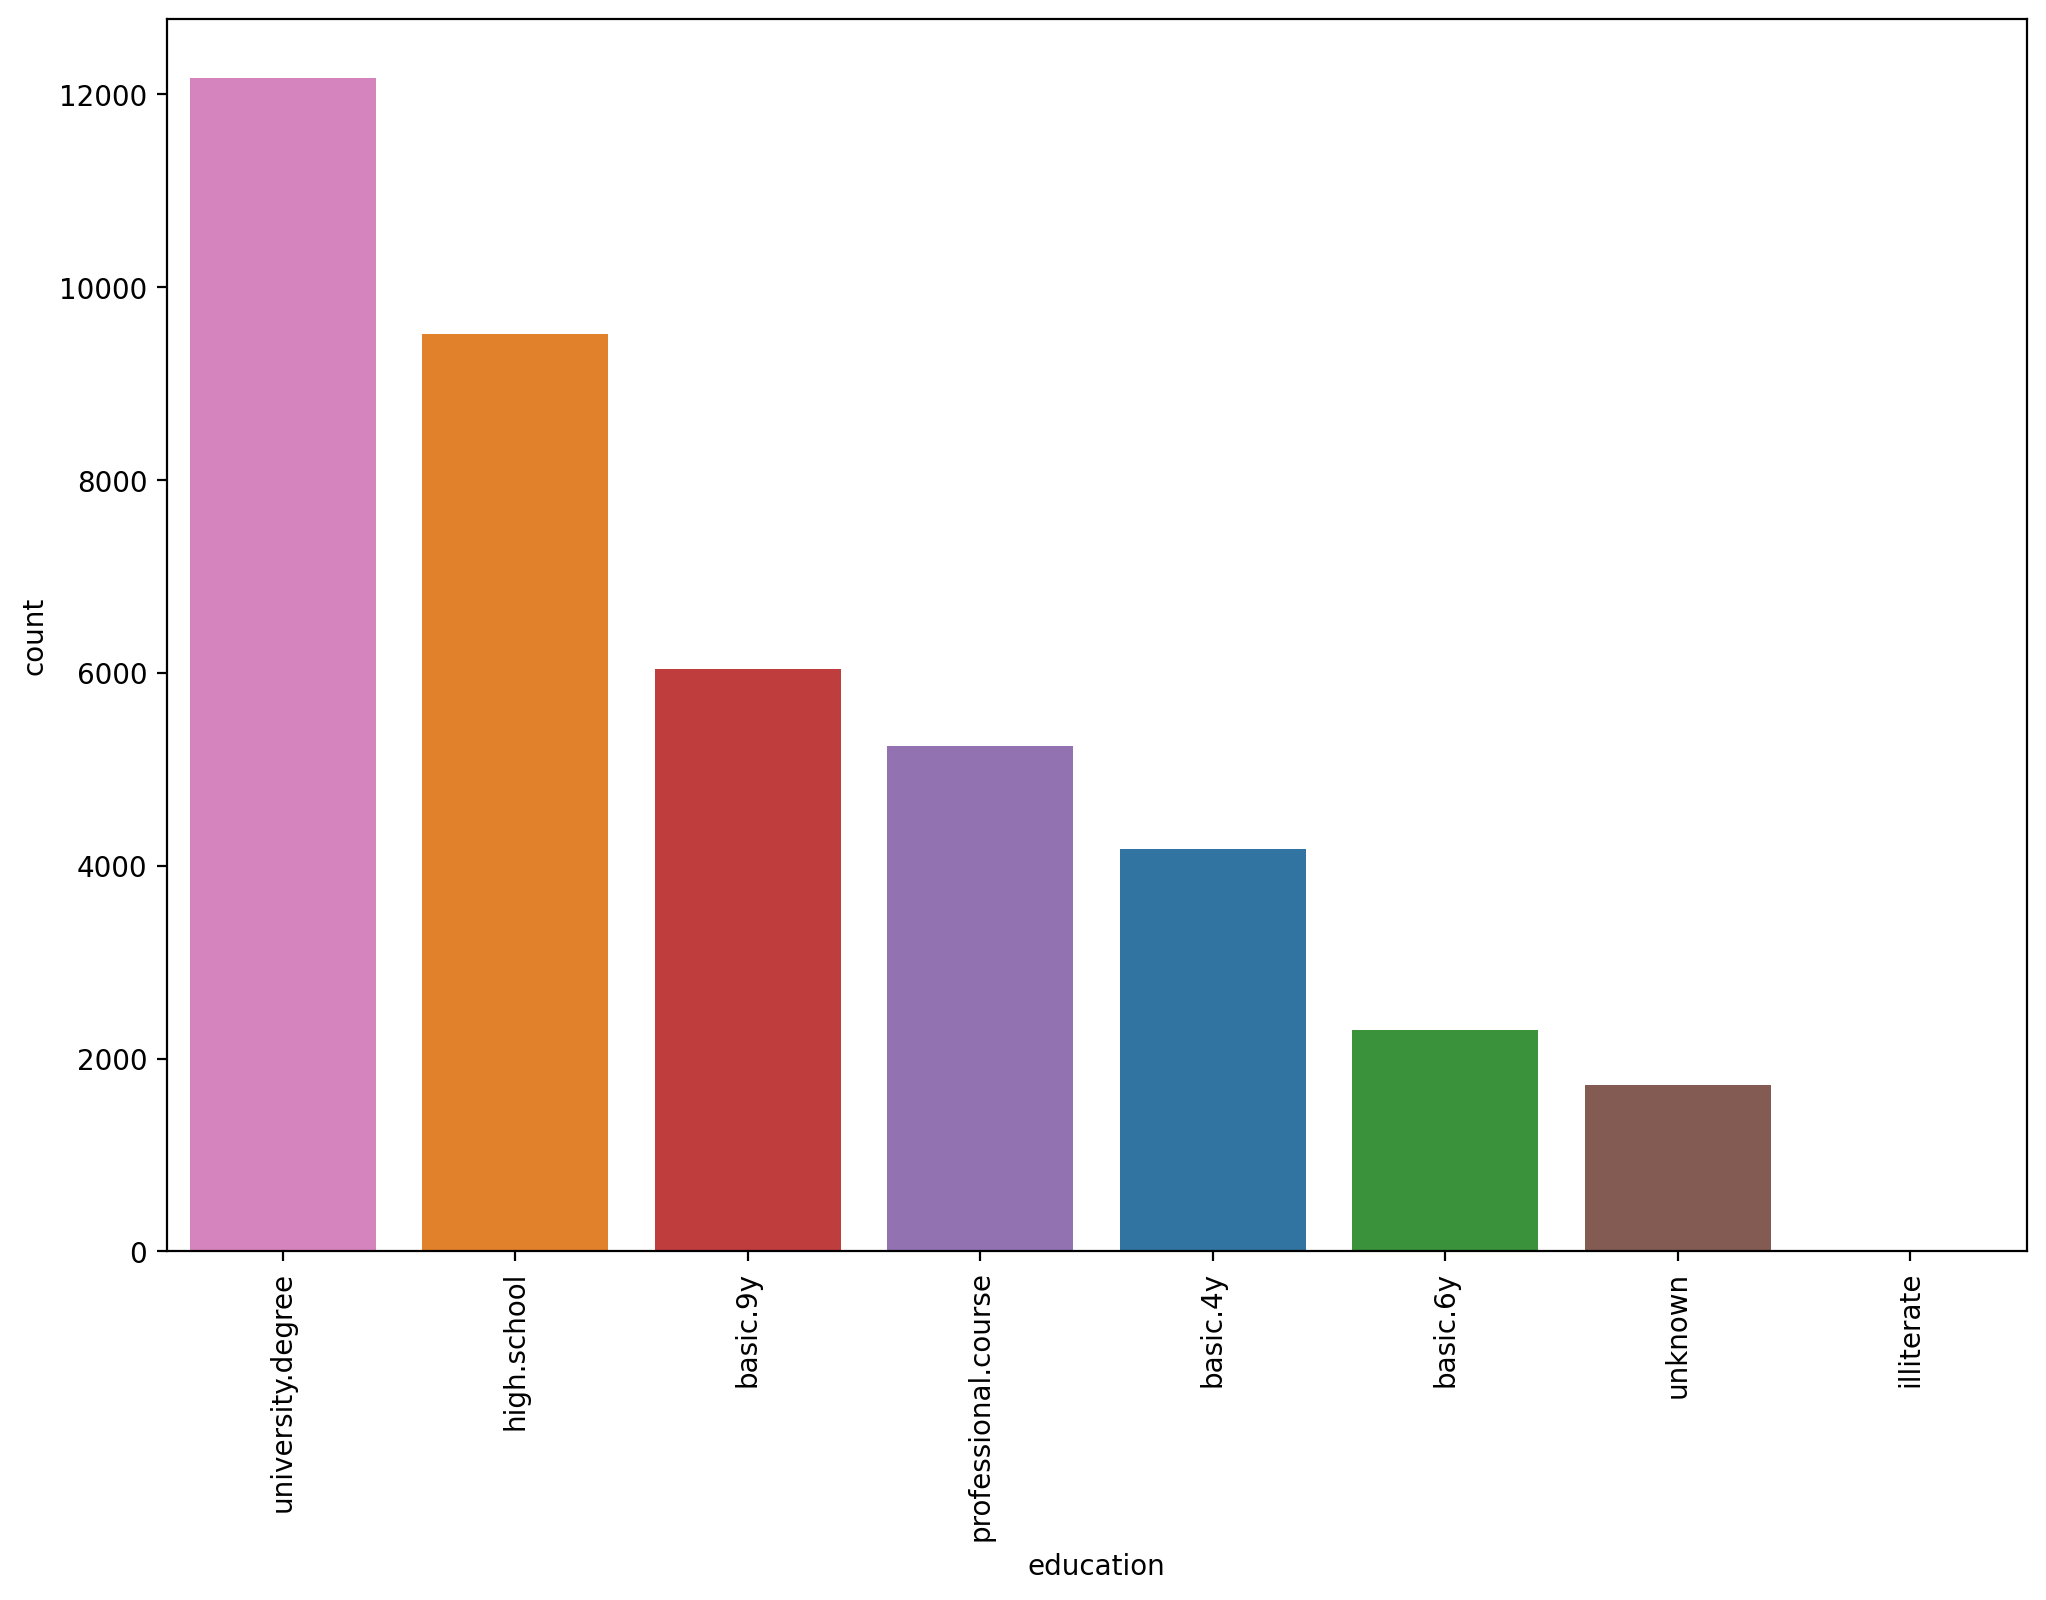

In [43]:
plt.figure(figsize=(12, 8), dpi=200)
sns.countplot(data=df, x='education', hue='education', order=df['education'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

Можно посмотреть связаны ли между собой признак, отвечающий за уровень образования и признак, который указывает на то, была ли просрочка по кредиту.

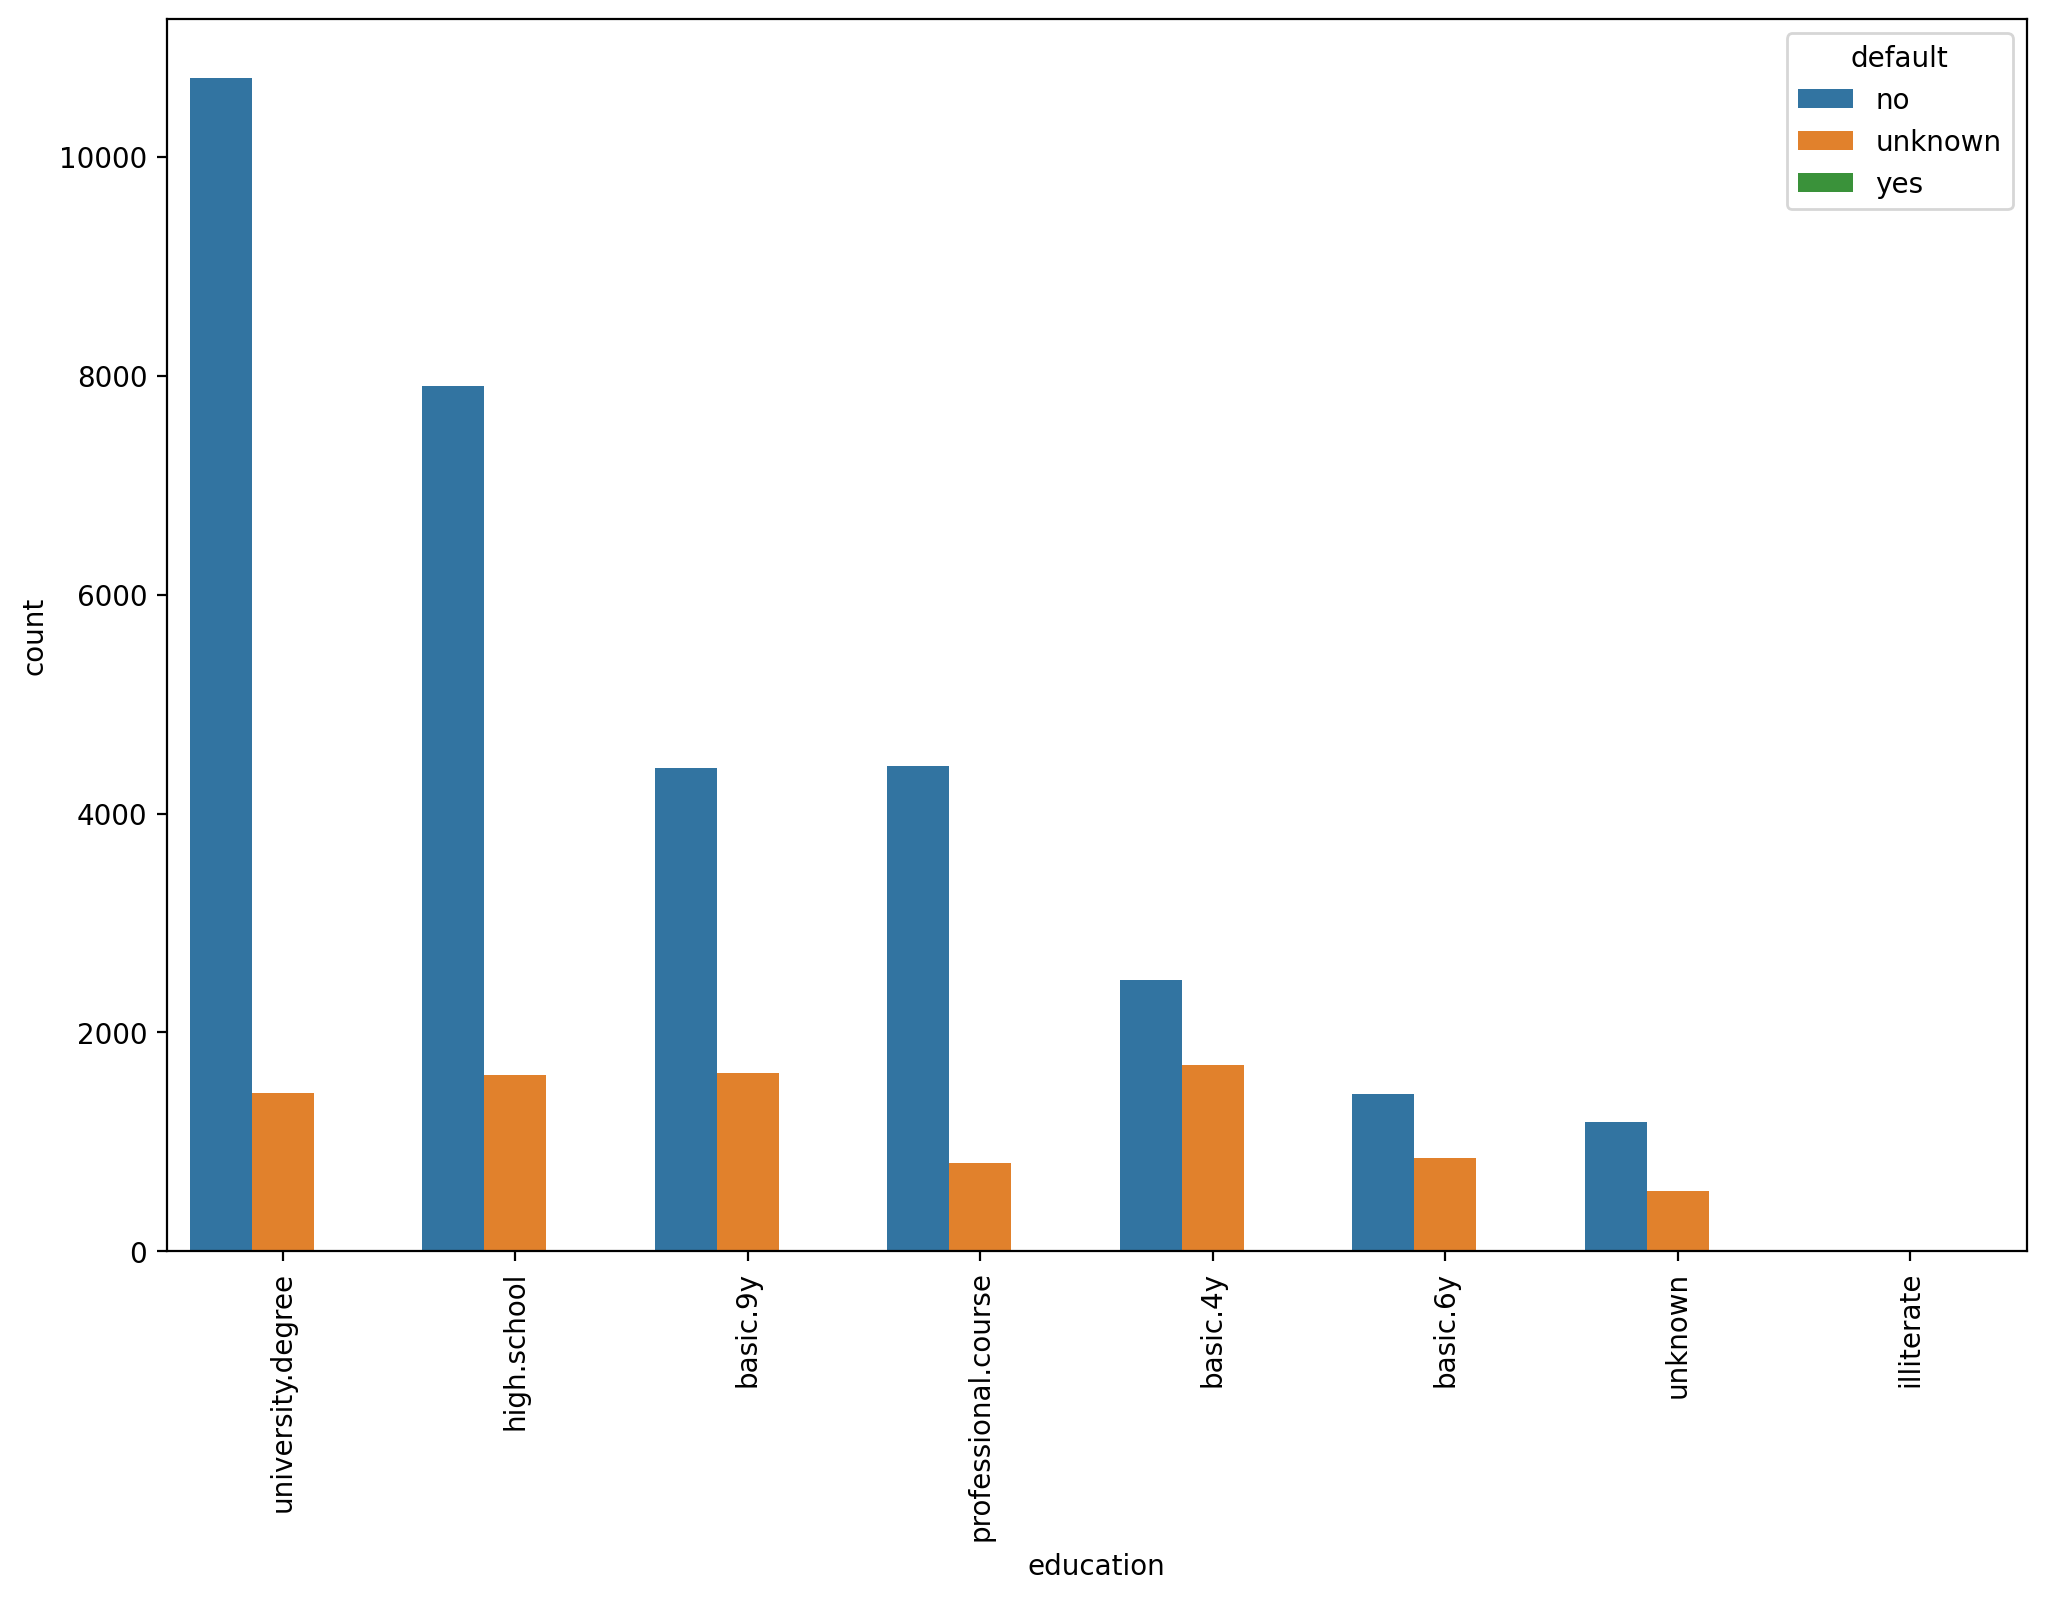

In [45]:
plt.figure(figsize=(12, 8), dpi=200)
sns.countplot(data=df, x='education', hue='default', order=df['education'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

Видим крайне малое количество значения yes, в основном - это no или unknown.

Здесь значение unknown означает две вещи:
1) Мы действительно не знаем были просрочки по кредиту или нет
2) У человека сейчас есть кредит, поэтому формально мы ещё не знаем как пройдёт его погашение

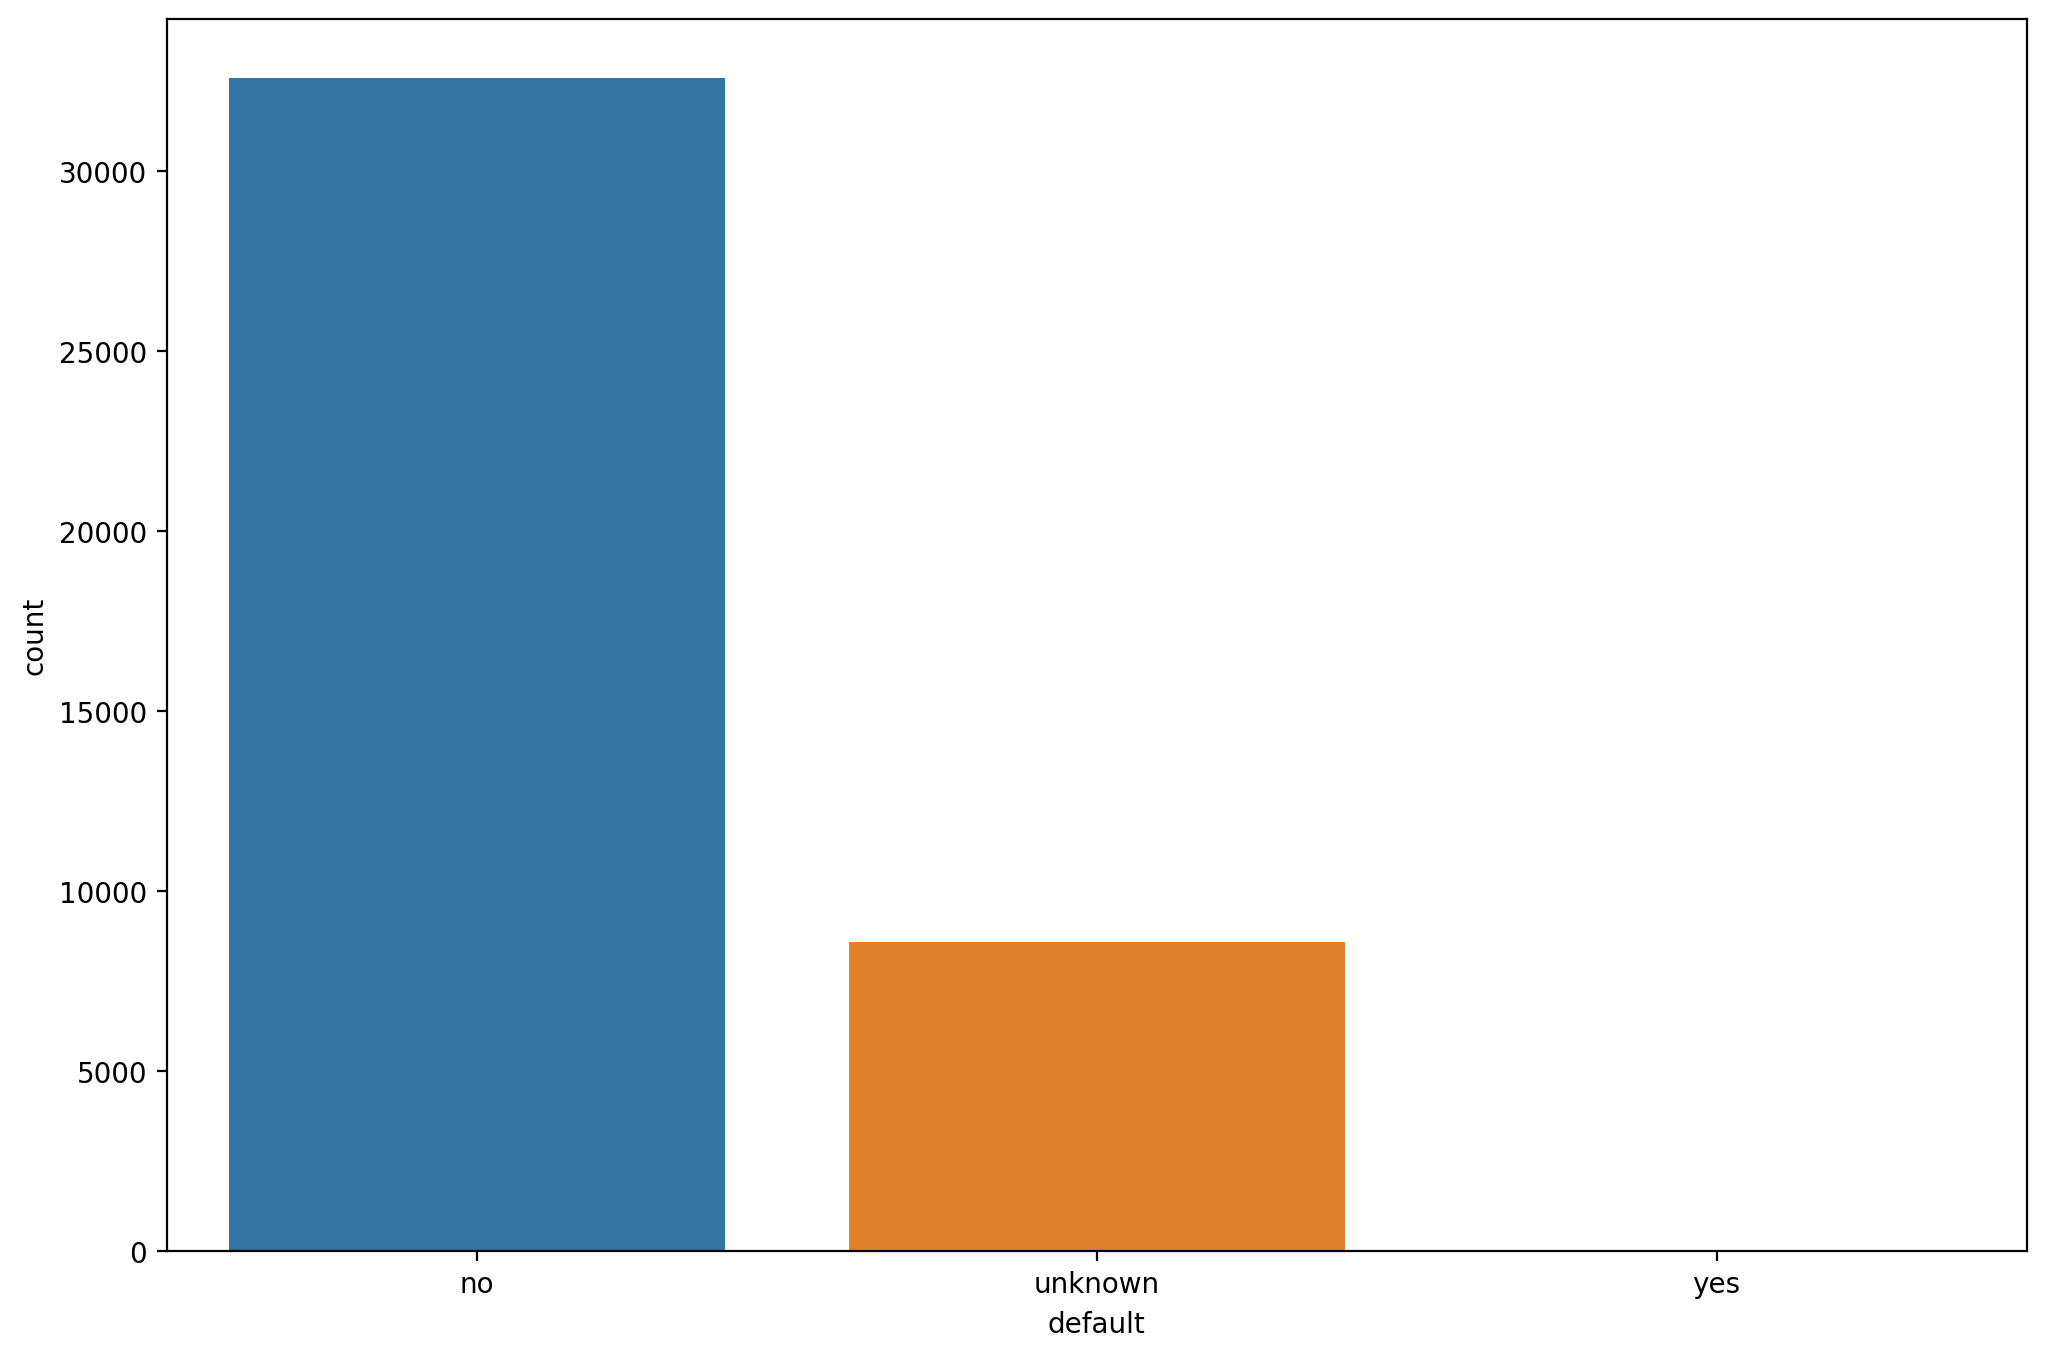

In [47]:
plt.figure(figsize=(12, 8), dpi=200)
sns.countplot(data=df, x='default', hue='default')
plt.show()

Здесь практически никого нет в категории yes.

In [49]:
df['default'].value_counts()

default
no         32588
unknown     8597
yes            3
Name: count, dtype: int64

In [51]:
df['loan'].value_counts()

loan
no         33950
yes         6248
unknown      990
Name: count, dtype: int64

<Figure size 2400x1600 with 0 Axes>

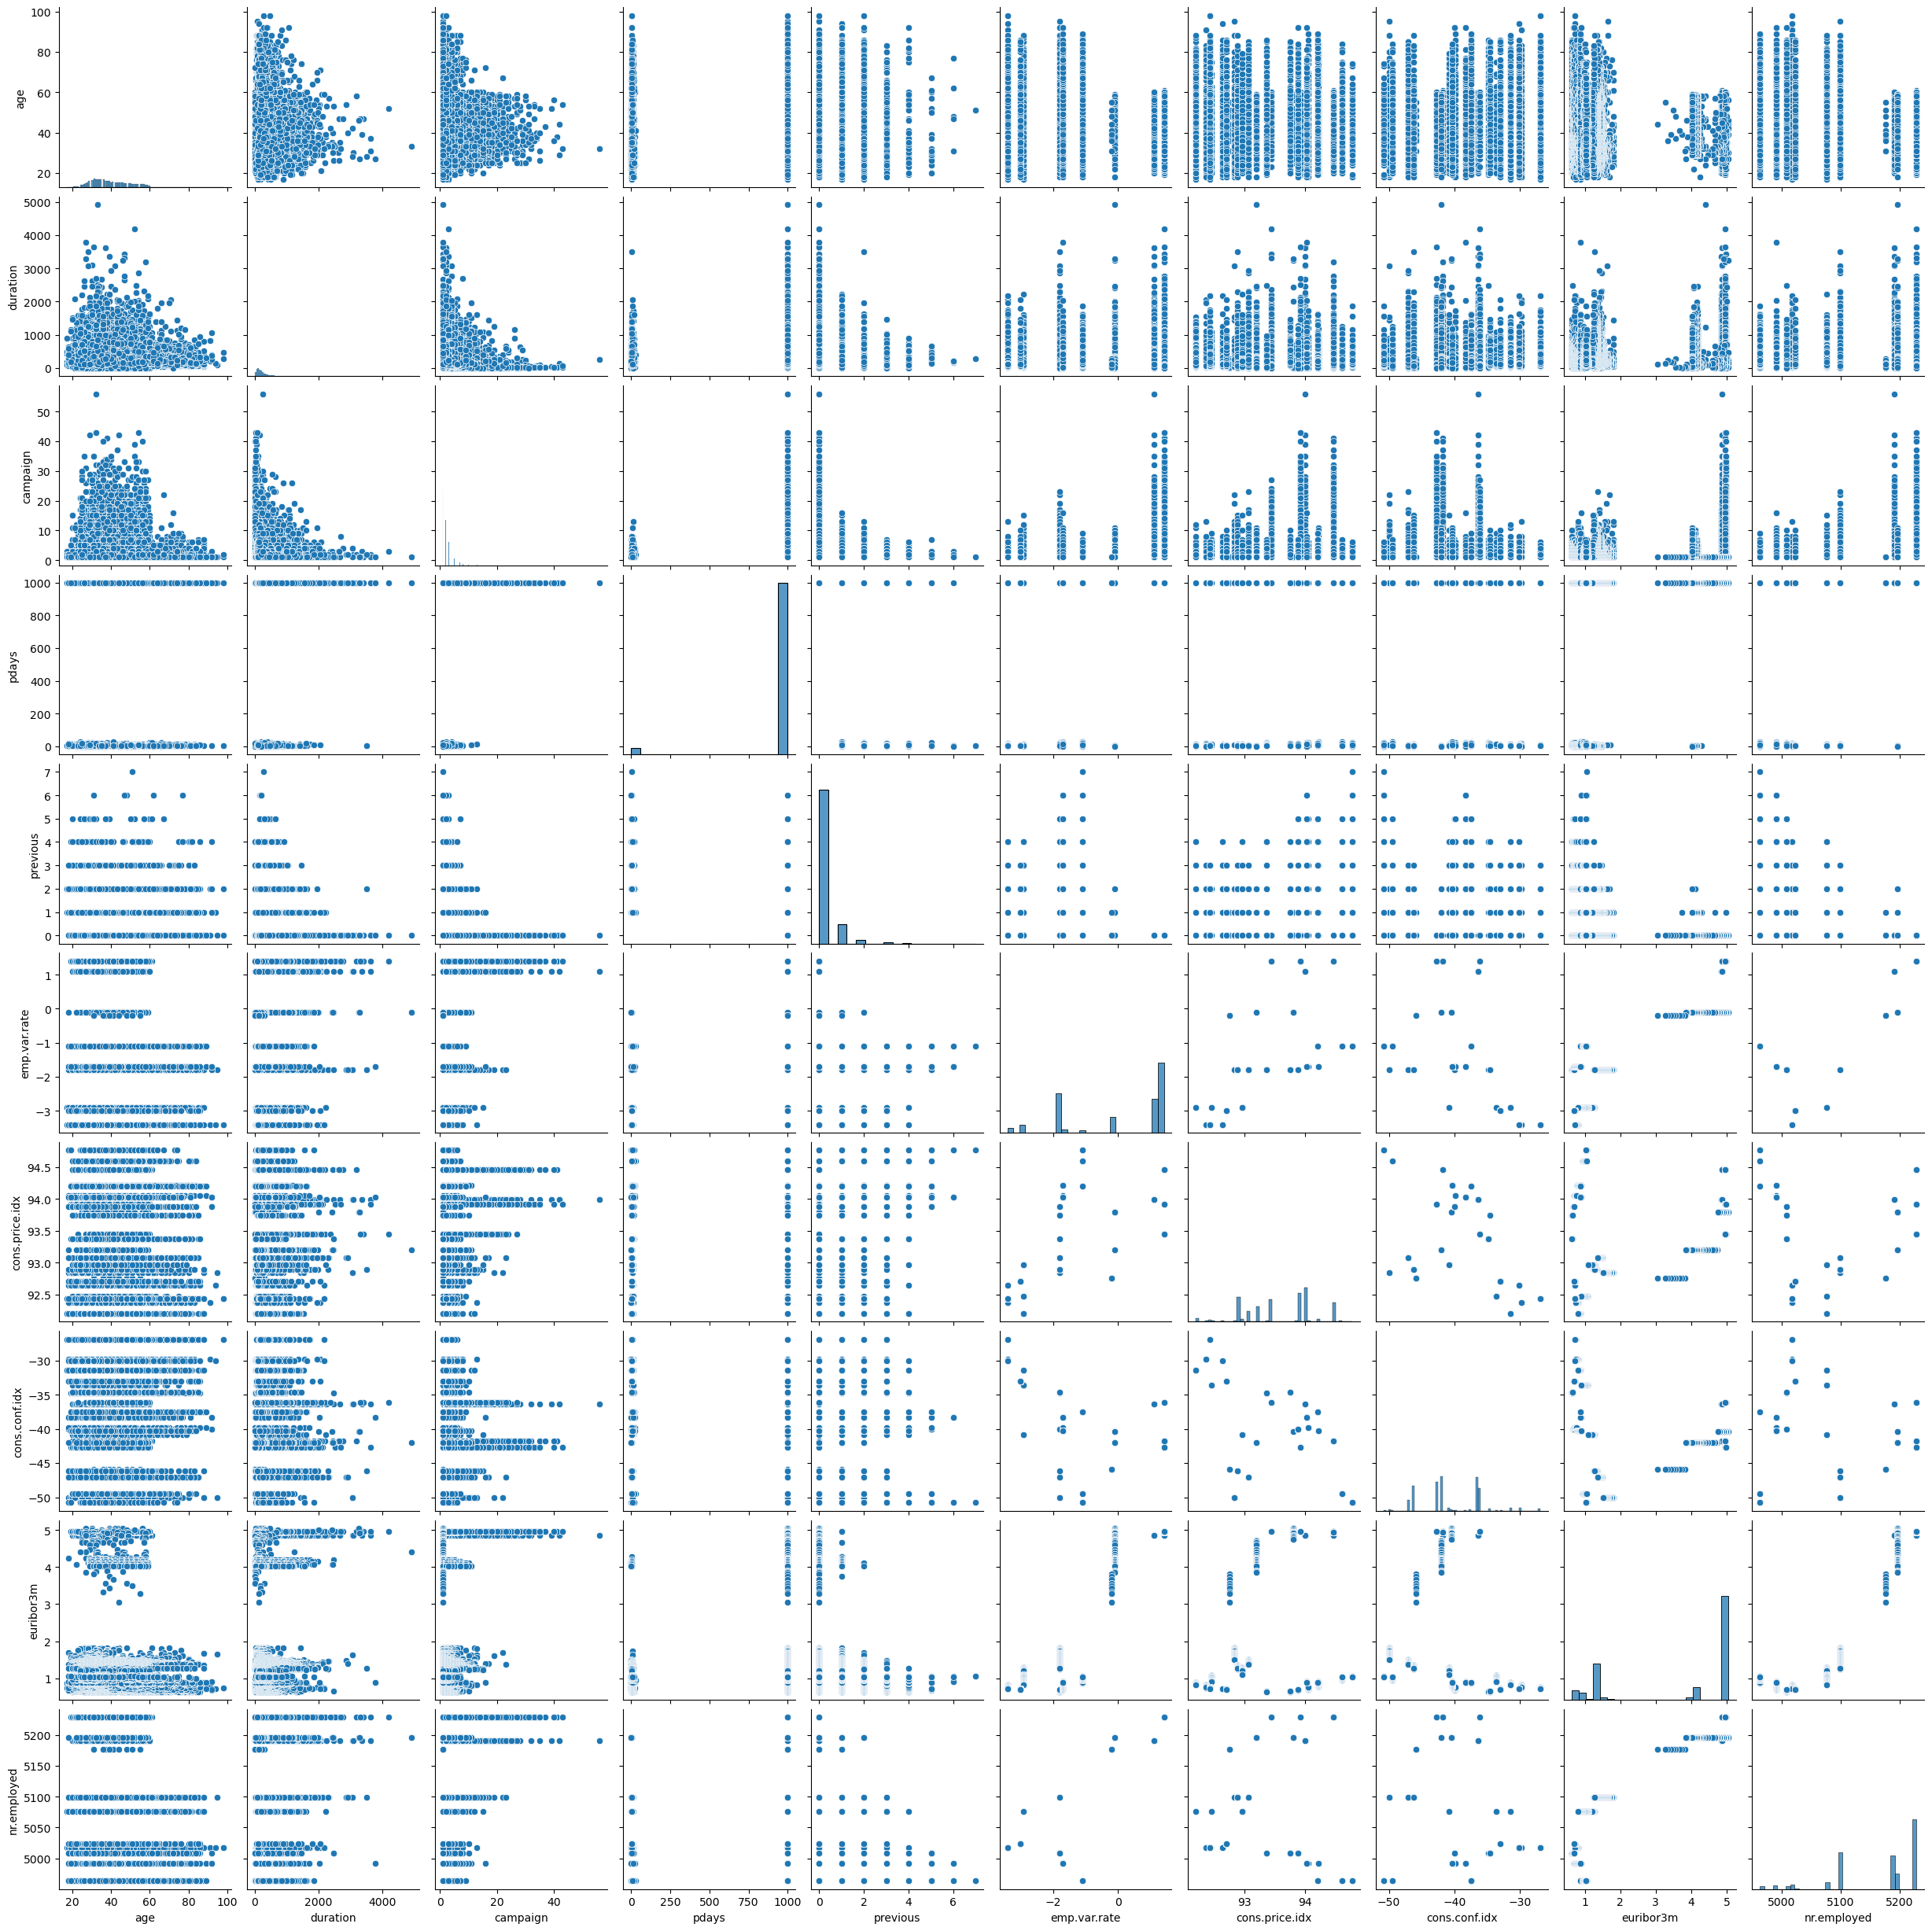

In [53]:
plt.figure(figsize=(12, 8), dpi=200)
sns.pairplot(data=df)
plt.show()

## Кластеризация данных

### Подготовка данных

**Напоминание по поводу алгоритмов обучения без учителя (unsupervised learning): не нужно выполнять разбиение на обучающий и тестовый наборы данных! Потому что нет целевой переменной, для сравнения с которой пригодился бы тестовый набор данных!**

Однако нам по-прежнему нужно преобразовать категориальные признаки в числовые - там, где это имеет смысл. А также нужно выполнить масштабирование данных, потому что расстояние между точками является важной частью алгоритмов кластеризации.

In [55]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [57]:
X = pd.get_dummies(df)

In [59]:
X

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,subscribed_no,subscribed_yes
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,False,True,False,False,False,False,True,False,True,False
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,False,True,False,False,False,False,True,False,True,False
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,False,True,False,False,False,False,True,False,True,False
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,False,True,False,False,False,False,True,False,True,False
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,False,True,False,False,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,True,False,False,False,False,False,True,False,False,True
41184,46,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,True,False,False,False,False,False,True,False,True,False
41185,56,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,True,False,False,False,False,False,True,False,True,False
41186,44,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,True,False,False,False,False,False,True,False,False,True


Отсутствие параметра drop_first=True в pd.get_dummies будет приводить к некоторому увеличению времени обучения. Но зато мы получаем следующее удобное свойство - все сгенерированные дамми-переменные становятся равнозначными. Намного удобнее увидеть в отдельной колонке, что какой-то признак равен 1, чем увидеть, что все остальные признаки равны 0 (и, следовательно, тот признак, который был удалён с помощью drop_first=True, должен быть равен 1, если бы он был).

Изначально минимизация количества признаков с помощью drop_first=True была задумана не только и даже не столько для уменьшения времени обучения модели, сколько для устранения эффекта мультиколлинеарности, когда наличие сильно связанных между собой признаков может негативно влиять на модель, например на модель линейной регрессии. Однако это верно не для всех моделей. Для кластеризации это не столь важно, поэтому может быть удобнее оставить все дамми-переменные.

При добавлении новых данных хочется, чтобы дамми-переменные генерировались для новых данных точно так же, как и для предыдущих данных. Однако "из коробки" `get_dummies` так не умеет. Что с этим делать - варианты решения можно почитать вот здесь:

https://stackoverflow.com/questions/28465633/easy-way-to-apply-transformation-from-pandas-get-dummies-to-new-data

https://stackoverflow.com/questions/59810000/how-can-i-use-pandas-get-dummies-for-new-data

Есть еще методы `One Hot` из модуля `encoding`.

### Масштабирование признаков
Этот шаг является обязательным, так как мы работаем с метриками расстояния и масштабирование нужно для того, чтобы у всех признаков были равные шансы поучаствовать в результате, независимо от масштаба того или иного признака.

In [61]:
from sklearn.preprocessing import StandardScaler

In [63]:
scaler = StandardScaler()

Мы будем использовать `.fit_transform()` потому что у нас нет разбиения на обучающую и тестовую выборки, в котором могла бы быть утечка данных. У нас есть только признаки без целевой переменной и мы масштабируем все эти признаки.

In [65]:
scaled_X = scaler.fit_transform(X)

### Создание и обучение модели KMeans

In [67]:
from sklearn.cluster import KMeans

In [69]:
help(KMeans)

Help on class KMeans in module sklearn.cluster._kmeans:

class KMeans(_BaseKMeans)
 |  KMeans(n_clusters=8, *, init='k-means++', n_init='auto', max_iter=300, tol=0.0001, verbose=0, random_state=None, copy_x=True, algorithm='lloyd')
 |
 |  K-Means clustering.
 |
 |  Read more in the :ref:`User Guide <k_means>`.
 |
 |  Parameters
 |  ----------
 |
 |  n_clusters : int, default=8
 |      The number of clusters to form as well as the number of
 |      centroids to generate.
 |
 |      For an example of how to choose an optimal value for `n_clusters` refer to
 |      :ref:`sphx_glr_auto_examples_cluster_plot_kmeans_silhouette_analysis.py`.
 |
 |  init : {'k-means++', 'random'}, callable or array-like of shape             (n_clusters, n_features), default='k-means++'
 |      Method for initialization:
 |
 |      * 'k-means++' : selects initial cluster centroids using sampling             based on an empirical probability distribution of the points'             contribution to the overall ine

Первые точки выбираются случайным образом, но можно указать какие-то конкретные точки, с которых начинать итерации, а также можно указать `random_state`, чтобы сделать результаты воспроизводимыми. 



In [71]:
model = KMeans(n_clusters=2)

**У нас есть следующие методы:**

* fit(X[, y, sample_weight])
    * Вычисление центров кластеров (выполнение кластеризации k-means).

* fit_predict(X[, y, sample_weight])
    * Вычисление центров кластеров и предсказание номеров кластеров для каждой точки.

* fit_transform(X[, y, sample_weight])
    * Вычисление центров кластеров и преобразование X в пространство cluster-distance - вернет расстояние от точек до центра кластеров.

* predict(X[, sample_weight])
    * Предсказание ближайшего кластера для каждой точки из данных X.

In [73]:
cluster_labels = model.fit_predict(scaled_X)

In [75]:
cluster_labels

array([1, 1, 1, ..., 0, 0, 0], dtype=int32)

Здесь числа 0 и 1 означают различные кластеры, однако сами номера не имеют никакого смысла, они присваиваются случайным образом. Если мы запустим предыдущие команды ещё раз 0 и 1 поменяются местами, по сути мы получаем одни и те же результаты, но в одних случаях именуем кластеры как 0 и 1, а в каких-то других случаях те же самые кластеры именуются наоборот как 1 и 0. 

**Мы относим одни и те же строки к одному и тому же кластеру, однако обозначение кластера может быть разным.**

In [77]:
len(scaled_X)

41188

In [79]:
len(cluster_labels)

41188

In [81]:
X['Cluster'] = cluster_labels

In [83]:
X

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,subscribed_no,subscribed_yes,Cluster
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,True,False,False,False,False,True,False,True,False,1
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,True,False,False,False,False,True,False,True,False,1
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,True,False,False,False,False,True,False,True,False,1
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,True,False,False,False,False,True,False,True,False,1
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,True,False,False,False,False,True,False,True,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,False,False,False,False,False,True,False,False,True,0
41184,46,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,False,False,False,False,False,True,False,True,False,0
41185,56,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,False,False,False,False,False,True,False,True,False,0
41186,44,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,False,False,False,False,False,True,False,False,True,0


Теперь у нас есть колонка Cluster - это как бы y, который мы сами создали

### Как интерпретировать полученные результаты

In [85]:
X.corr()['Cluster']

age                     0.019659
duration               -0.040051
campaign                0.129101
pdays                   0.267686
previous               -0.478442
                          ...   
poutcome_nonexistent    0.544348
poutcome_success       -0.254379
subscribed_no           0.294748
subscribed_yes         -0.294748
Cluster                 1.000000
Name: Cluster, Length: 66, dtype: float64

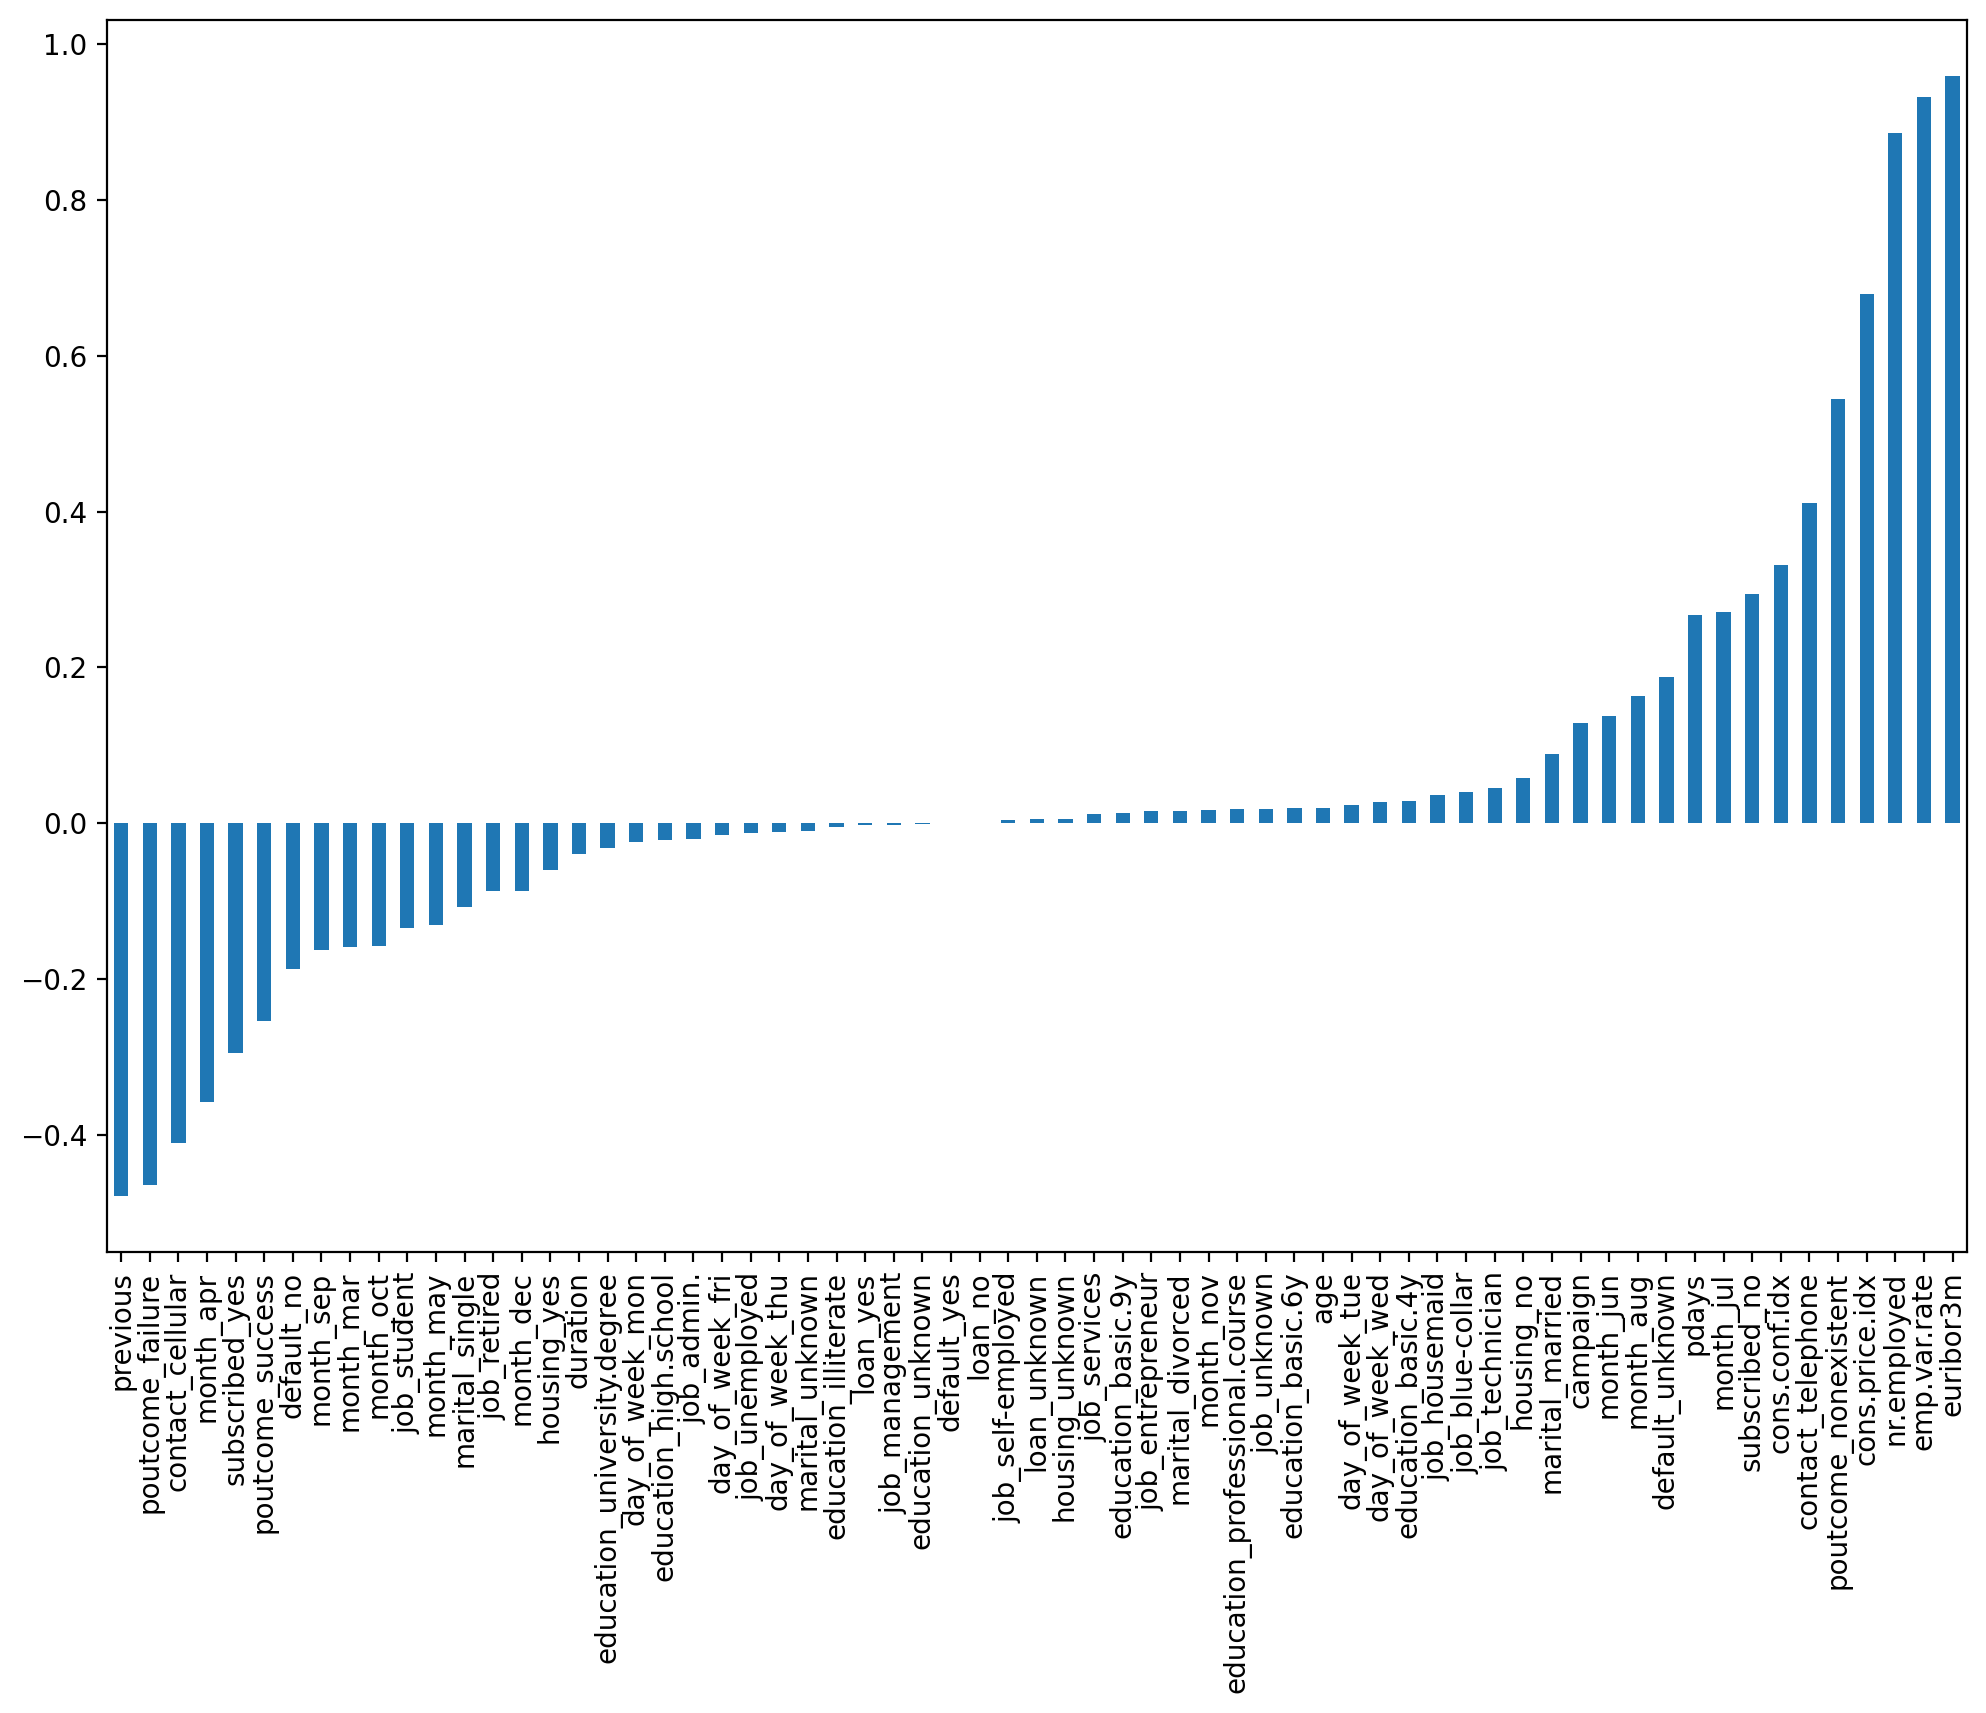

In [87]:
plt.figure(figsize=(12, 8), dpi=200)
X.corr()['Cluster'].iloc[:-1].sort_values().plot(kind='bar')
plt.show()

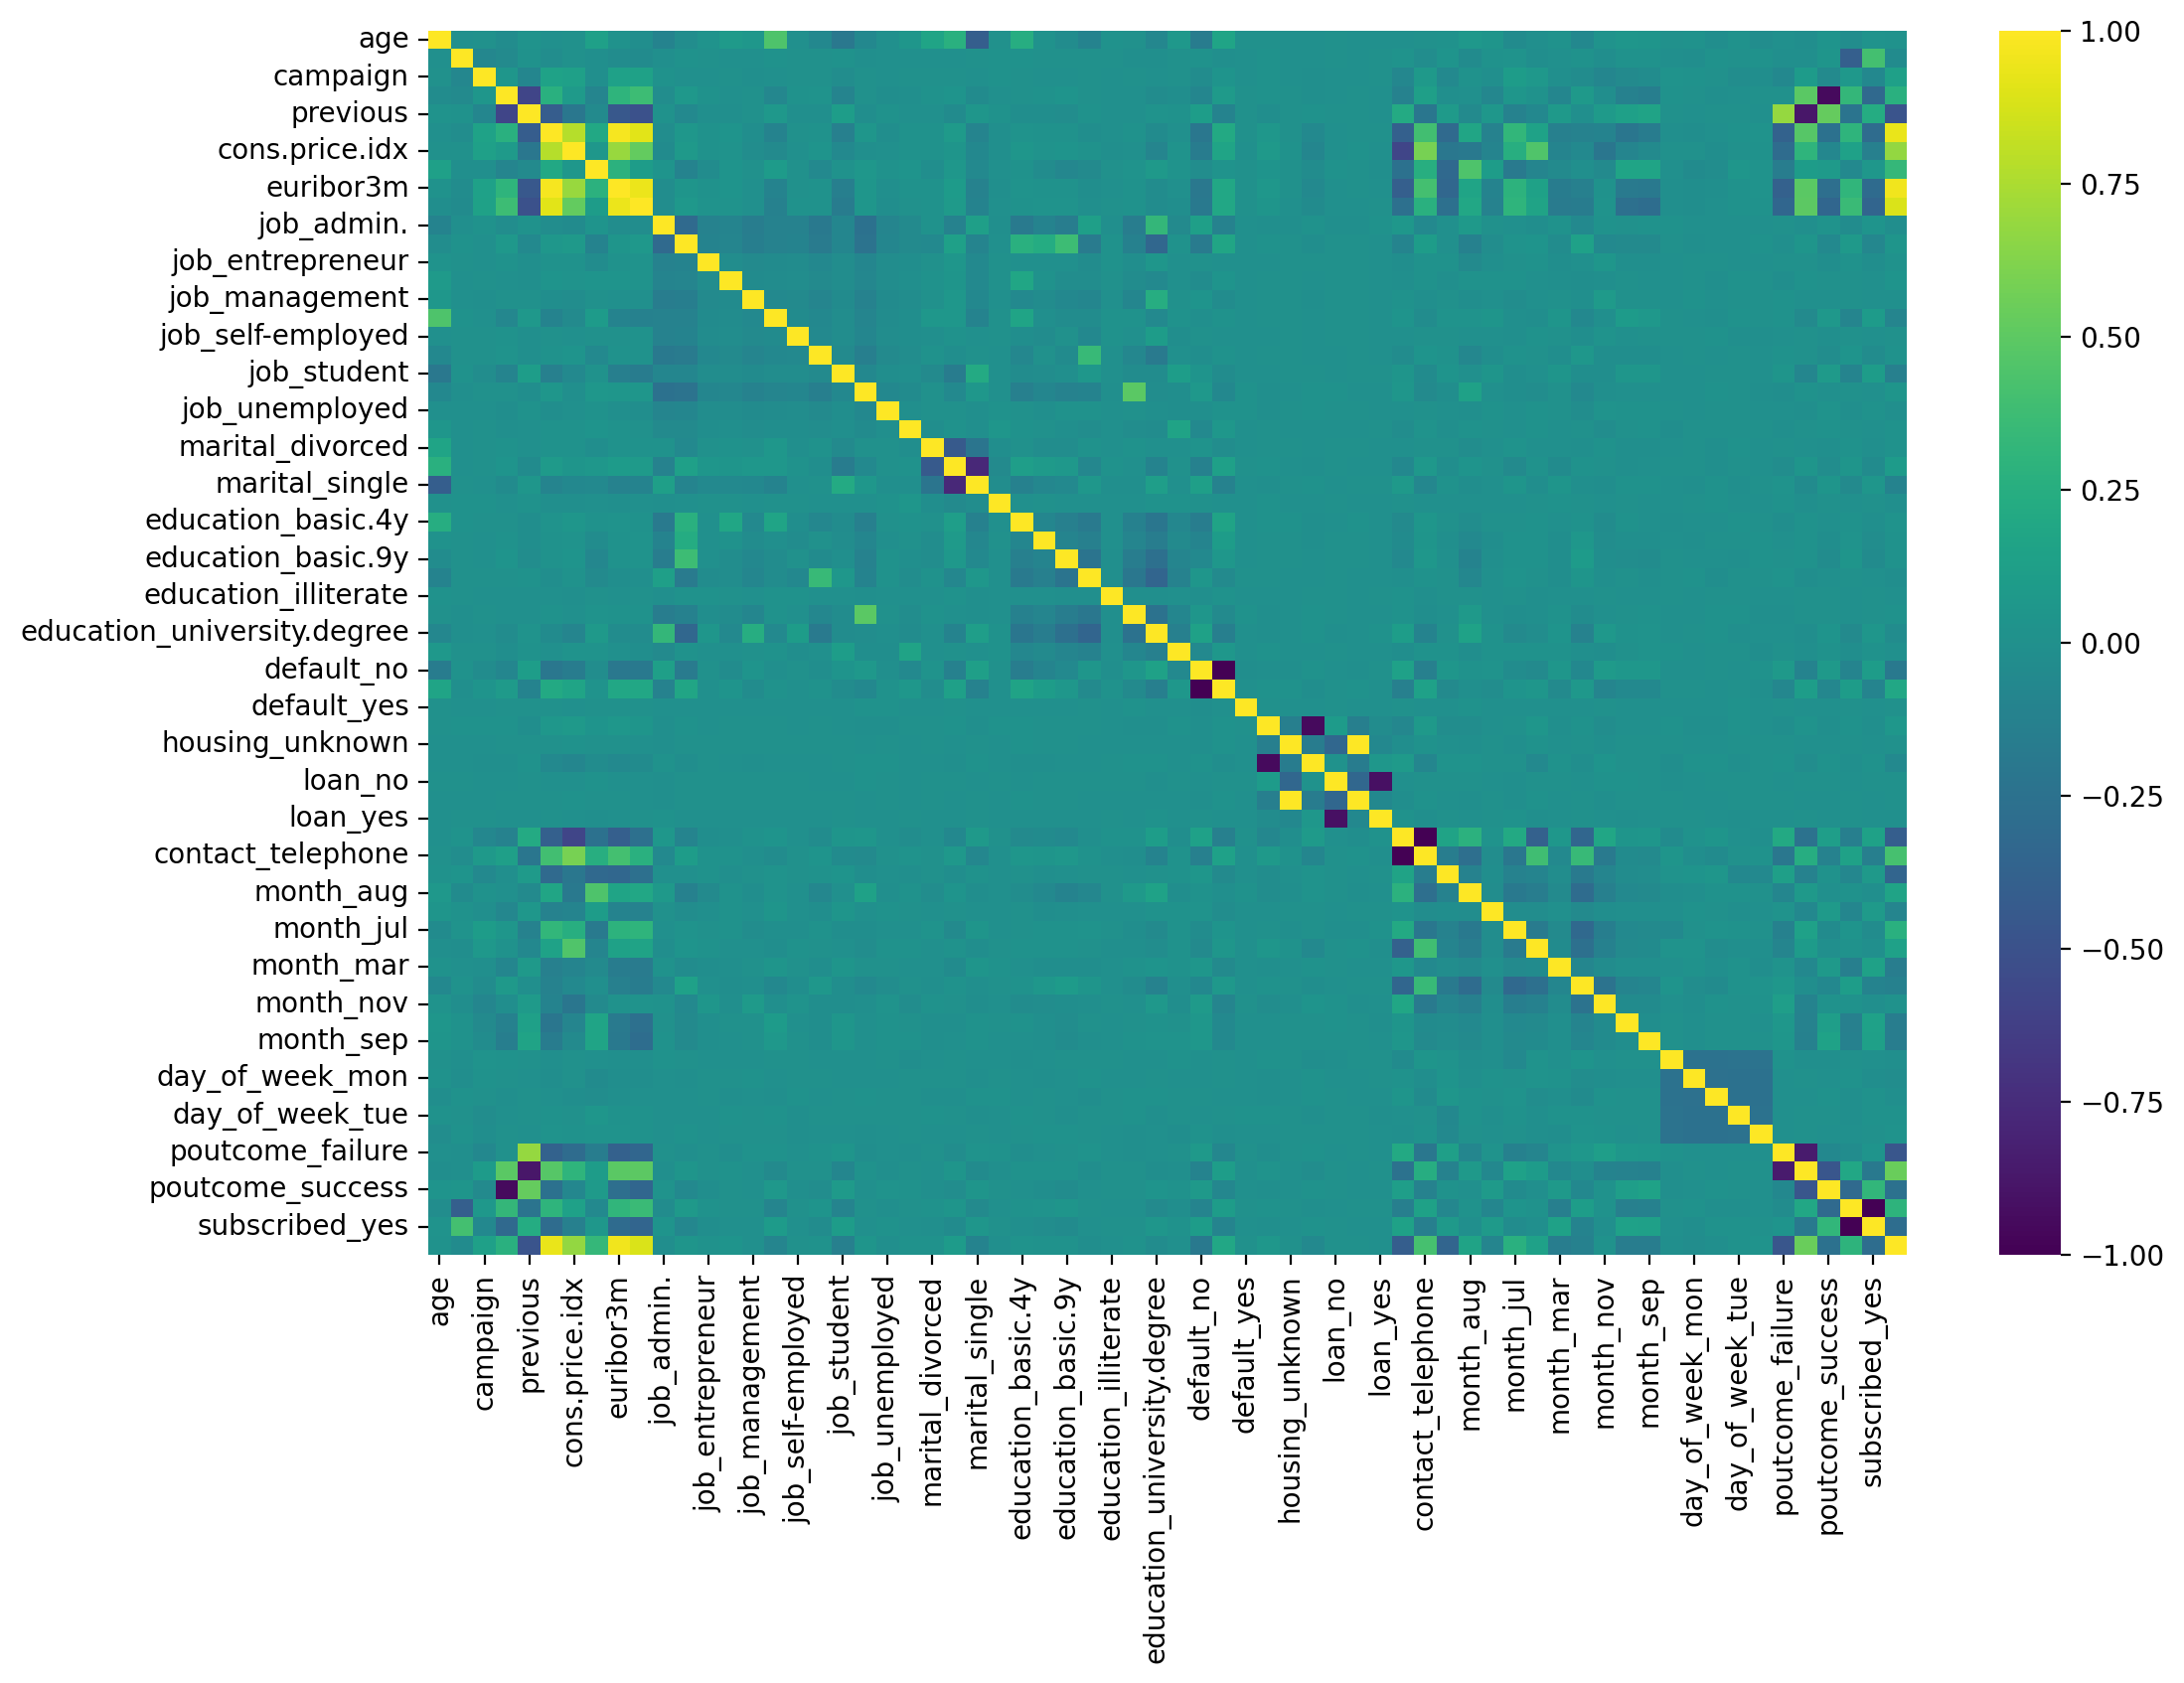

In [89]:
plt.figure(figsize=(12, 8), dpi=200)
sns.heatmap(X.corr(), cmap='viridis')
plt.show()

## Выбираем значение K

### Метод локтя

In [92]:
ssd = []

for k in range(2, 10):
    model = KMeans(n_clusters=k)
    model.fit(scaled_X)
    
    # Добавляем сумму квадратов расстояний  
    # от точек до центров кластеров
    ssd.append(model.inertia_) 

In [94]:
ssd

[2469792.367302077,
 2371352.6696267007,
 2292017.4280265155,
 2254187.30717086,
 2167903.298086848,
 2119186.6017400865,
 2098048.43974019,
 2067414.5104117354]

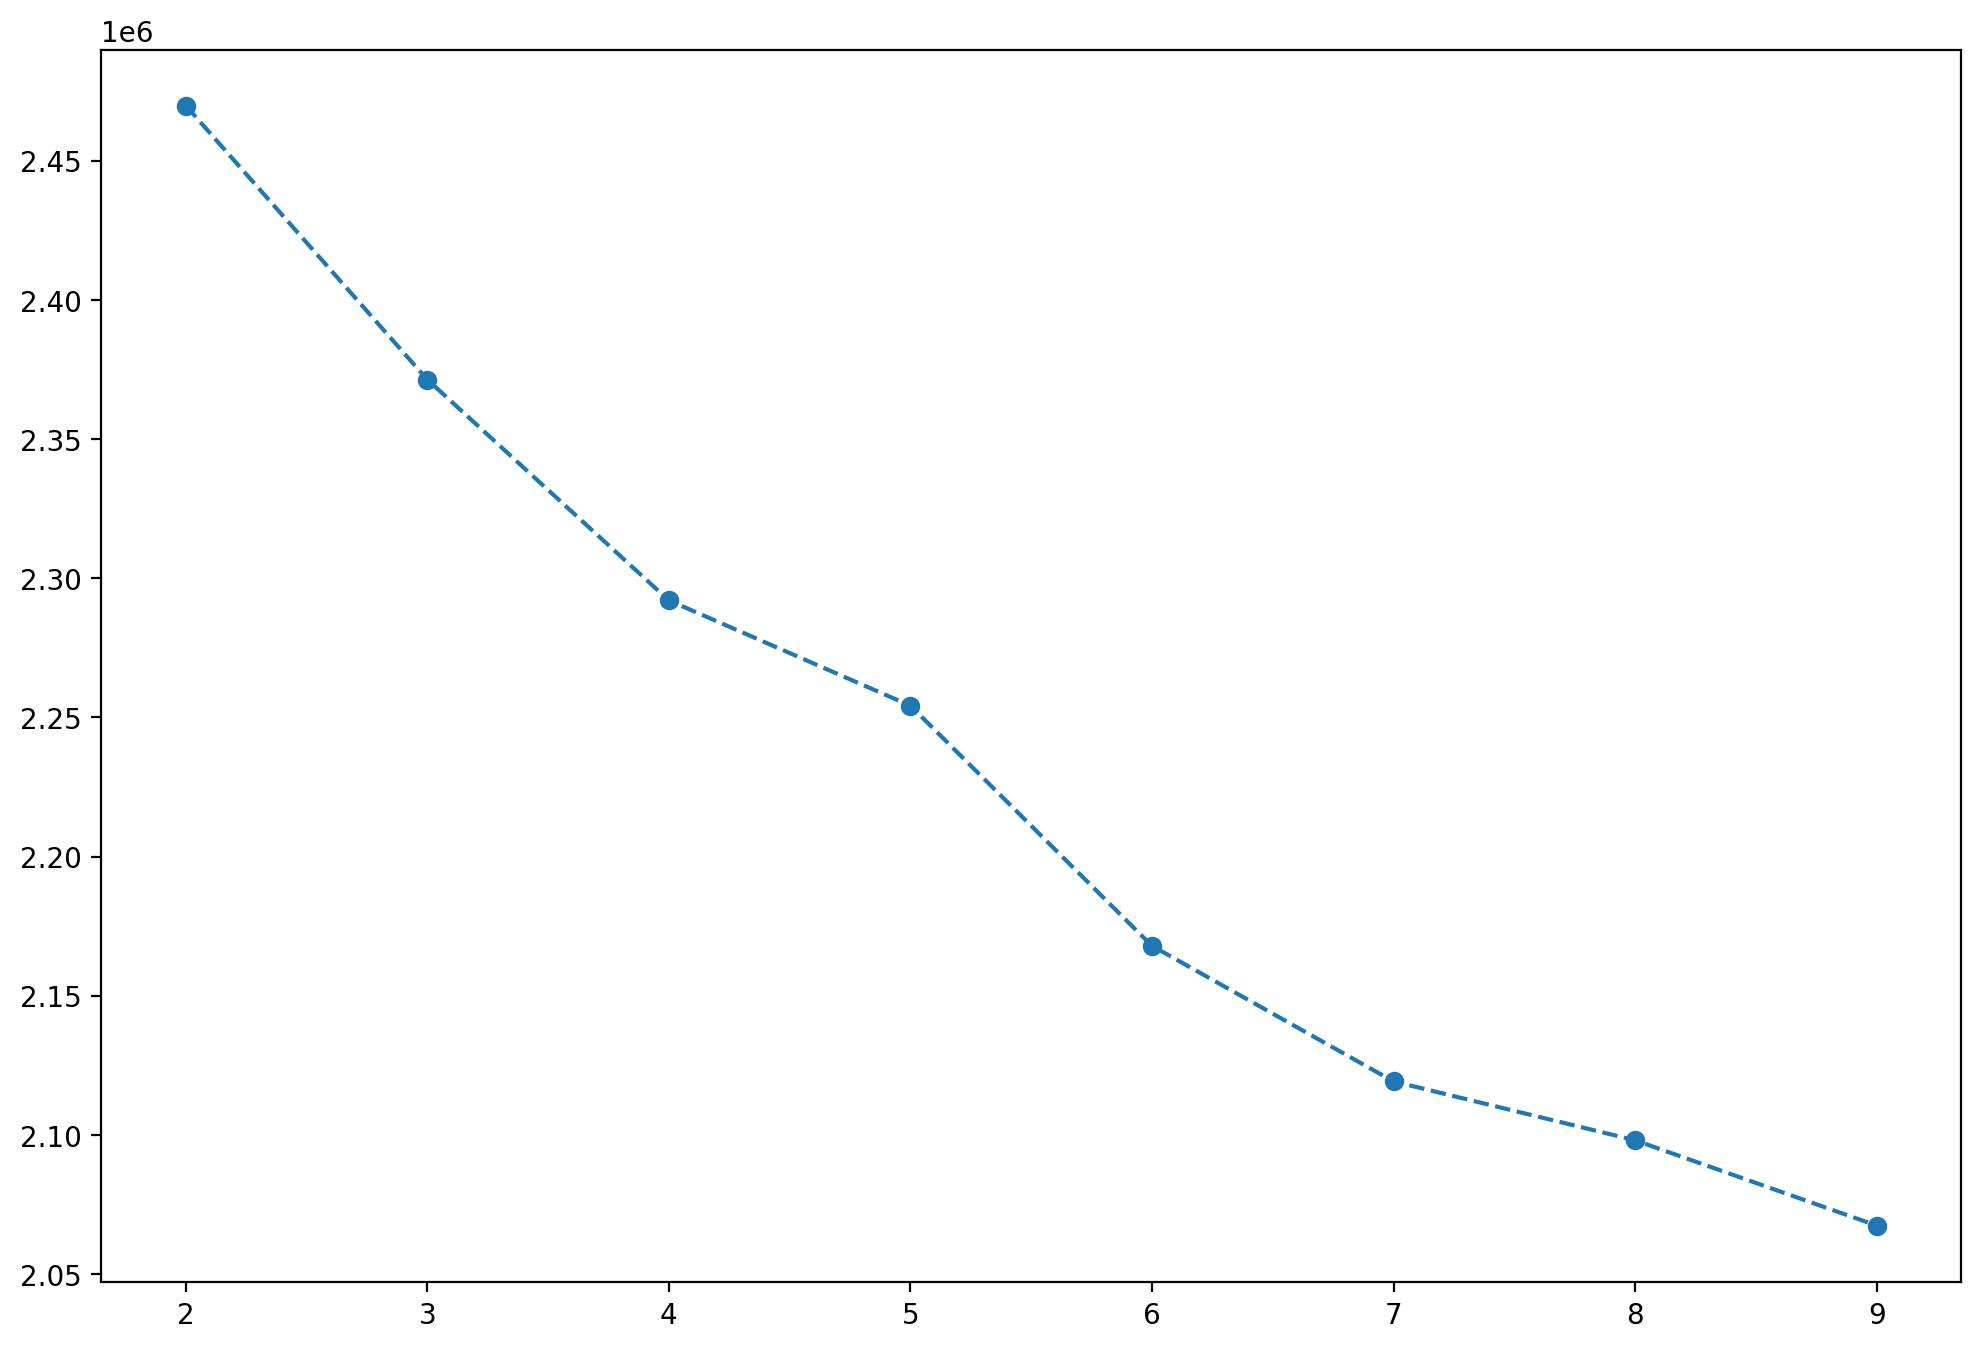

In [96]:
plt.figure(figsize=(12, 8), dpi=200)
plt.plot(range(2, 10), ssd, 'o--')
plt.show()

In [98]:
pd.Series(ssd)

0    2.469792e+06
1    2.371353e+06
2    2.292017e+06
3    2.254187e+06
4    2.167903e+06
5    2.119187e+06
6    2.098048e+06
7    2.067415e+06
dtype: float64

In [102]:
# Изменение метрики SSD - текущее минус предыдущее значение!
pd.Series(ssd).diff()

0             NaN
1   -98439.697675
2   -79335.241600
3   -37830.120856
4   -86284.009084
5   -48716.696347
6   -21138.162000
7   -30633.929328
dtype: float64

Получаем изменения между значениями, они отрицательные потому что объекты в исходном объекте Series уменьшаются. Здесь необходимо найти одну или несколько точек, где изменение было заметно меньше, чем остальные.

**Важно: индексы в этом объекте *Series* не соответствуют номерам K!**

In [105]:
pd.DataFrame(data=zip(range(2, 10), pd.Series(ssd).diff()), columns=['K', 'SSD diff'])

,K,SSD diff
0,2,NaN
1,3,-98439.697675
2,4,-79335.241600
3,5,-37830.120856
4,6,-86284.009084
5,7,-48716.696347
6,8,-21138.162000
7,9,-30633.929328


Следующим шагом можно заново записать полученные значения в колонку cluster и снова посмотреть корреляцию признаков с получившейся переменной cluster, чтобы лучше понять, какие признаки лучше повлияли на кластеризацию данных.

### Метод силуэтов
`silhouette_score` - вычисляет метрику силуэтов для целого набора точек  
`silhouette_samples` - вычисляет метрику силуэтов для каждой отдельной точки

In [112]:
from sklearn.metrics import silhouette_score

In [114]:
silhouettes = []

for k in range(2, 10):
    model = KMeans(n_clusters=k)
    model.fit(scaled_X)
    
    # Добавляем сумму квадратов расстояний  
    # от точек до центров кластеров
    silhouettes.append(silhouette_score(scaled_X, model.labels_)) 

In [116]:
silhouettes

[np.float64(0.11700113001983012),
 np.float64(0.04928123617039738),
 np.float64(0.05864853652257012),
 np.float64(0.056248923821268663),
 np.float64(0.06442303618405106),
 np.float64(0.05249912587674085),
 np.float64(0.06720311646372894),
 np.float64(0.053710482125368865)]

Видим достаточно низкие значения метрики silhouette_score. Это означает, что полученные кластеры не очень компактные и находятся достаточно близко друг к другу.

Что делать в таком случае?
1) Исследовать данные на предмет наличия выбросов, так как метод Kmeans является чувствительным к наличию выбросов. Если какая-то точка находится далеко от остальных, то из-за нее центр того кластера где находится эта точка будет заметно смещён. Это помешает алгоритму Kmeans хорошо находить кластеры
2) Можно попробовать другой алгоритм кластеризации
3) Уточнить постановку задачи